!pip install catboost

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import Image
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.model_selection import KFold
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import LogisticRegression
#from catboost import Pool, CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family = 'malgun gothic')
mpl.rc('axes', unicode_minus=False)

sns.set(font="malgun gothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc('figure', figsize=(10, 8))

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('C:/k_digital/source/Machine Learning with Python/ML project/oil/train.csv')
data1 = pd.read_csv('C:/k_digital/source/Machine Learning with Python/ML project/oil/train.csv')
test = pd.read_csv('C:/k_digital/source/Machine Learning with Python/ML project/oil/test.csv')
data

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,8,200,0,2,201,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,2,200,0,3,85,0,...,NaN,NaN,NaN,NaN,NaN,0,14.5,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,9,550,0,6,0,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,19,550,0,2,4,0,...,7.0,8.0,100.0,1625.0,18890.0,0,NaN,44.3,652,0


In [4]:
data_features = ['YEAR','COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 
                       'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']

data = data[data_features]
# test = test[data_features]
# 'COMPONENT_ARBITRARY', 'ANONYMOUS_1'

In [5]:
test_features = ['YEAR','COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 
                       'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']
test = test[test_features]

In [6]:
data.shape

(14095, 18)

In [7]:
data.head(3)

,YEAR,COMPONENT_ARBITRARY,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,2011,COMPONENT3,1486,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75
1,2021,COMPONENT2,1350,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652
2,2015,COMPONENT2,2415,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412


# 라벨인코딩

In [8]:
le = LabelEncoder()
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']
for col in categorical_features:    
    data[col] = le.fit_transform(data[col])

In [9]:
le = LabelEncoder()
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']
for col in categorical_features:    
    test[col] = le.fit_transform(test[col])

In [10]:
data['YEAR'].unique()

array([ 4, 14,  8,  3,  1,  2,  7, 11,  6,  9, 10,  5, 12,  0, 15, 13],
      dtype=int64)

In [11]:
data.head(3)

,YEAR,COMPONENT_ARBITRARY,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,4,2,1486,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75
1,14,1,1350,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652
2,8,1,2415,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412


In [12]:
# 스케일링
data_need_scale = data.drop(columns = ['COMPONENT_ARBITRARY', 'YEAR'])

ss = StandardScaler()
data_scaled = ss.fit_transform(data_need_scale)
data_scaled

array([[-0.39376339, -0.3407601 , -0.15021362, ..., -0.1065502 ,
         0.89989172, -0.96600175],
       [-0.42602191, -0.0225763 , -0.15021362, ..., -0.1065502 ,
        -1.31737552,  0.11914661],
       [-0.17340923, -0.3407601 , -0.15021362, ..., -0.1065502 ,
        -0.74088603, -0.33221493],
       ...,
       [-0.3221305 ,  0.29560751, -0.15021362, ..., -0.1065502 ,
        -1.11580577,  1.33970343],
       [-0.15372204,  0.29560751, -0.15021362, ..., -0.1065502 ,
        -1.31132842,  0.11914661],
       [-0.29509027, -0.3407601 , -0.15021362, ..., -0.1065502 ,
        -1.25690459,  0.04391969]])

In [13]:
test_need_scale = test.drop(columns = ['COMPONENT_ARBITRARY', 'YEAR'])

ss = StandardScaler()
test_scaled = ss.fit_transform(test_need_scale)
test_scaled

array([[-0.20832585, -0.34182023, -0.14900964, ..., -0.12384153,
        -0.42300603,  0.96054395],
       [-0.08380289, -0.34182023, -0.14900964, ..., -0.12384153,
         0.36151644, -1.0724087 ],
       [-0.2517641 , -0.34182023, -0.14900964, ..., -0.12384153,
        -1.45875198,  0.25023519],
       ...,
       [ 0.23288258, -0.34182023, -0.14900964, ..., -0.12384153,
         4.22462848, -1.07052459],
       [-0.37959664, -0.34182023, -0.14900964, ..., -0.12384153,
        -1.30889938, -0.19441432],
       [-0.16592186,  2.13663024,  5.40757816, ..., -0.12384153,
        -0.6720258 ,  0.73256687]])

In [14]:
data_need_scale.columns

Index(['ANONYMOUS_1', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN',
       'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN'],
      dtype='object')

In [15]:
data_name = ['ANONYMOUS_1', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN',
       'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']


data_df = pd.DataFrame(data_scaled, columns = data_name)
data_df

,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,-0.393763,-0.340760,-0.150214,-0.089633,0.339245,0.336858,1.331290,-0.041588,1.186914,-0.384284,1.384414,5.293270,0.622282,-0.10655,0.899892,-0.966002
1,-0.426022,-0.022576,-0.150214,-0.089633,-0.115388,-0.027612,-0.330406,-0.041588,-0.250456,-0.400998,-0.191804,-0.259244,-0.102635,-0.10655,-1.317376,0.119147
2,-0.173409,-0.340760,-0.150214,-0.089633,-0.080416,-0.252497,-0.326655,-0.041588,-0.250456,-0.400998,-0.191804,-0.260552,-0.102635,-0.10655,-0.740886,-0.332215
3,1.006399,-0.340760,-0.150214,-0.089633,-0.115388,-0.260252,-0.264764,-0.041588,-0.160621,-0.400998,-0.191804,-0.242884,-0.102635,-0.10655,0.482642,-1.093888
4,0.191634,-0.340760,-0.150214,-0.089633,-0.115388,-0.268007,-0.200996,-0.041588,-0.250456,-0.400998,-0.191804,-0.129674,-0.102635,-0.10655,0.478611,-0.866326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,-0.362928,-0.340760,-0.150214,-0.089633,-0.115388,-0.244743,-0.291021,-0.041588,-0.250456,-0.400998,-0.191804,-0.248773,-0.102635,-0.10655,0.524972,-1.076961
14091,-0.085884,-0.340760,-0.150214,-0.089633,-0.115388,-0.252497,-0.311651,-0.041588,-0.250456,3.342831,-0.191804,-0.265787,-0.102635,-0.10655,0.164162,1.540935
14092,-0.322130,0.295608,-0.150214,-0.089633,0.024499,-0.213724,0.444177,-0.041588,0.378393,-0.233862,0.070899,0.150406,-0.102635,-0.10655,-1.115806,1.339703
14093,-0.153722,0.295608,-0.150214,-0.089633,-0.115388,1.050289,-0.298523,-0.041588,-0.250456,-0.384284,-0.191804,-0.264479,-0.102635,-0.10655,-1.311328,0.119147


In [16]:
test_name = ['ANONYMOUS_1', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN',
       'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']


test_df = pd.DataFrame(test_scaled, columns = data_name)
test_df

,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,-0.208326,-0.34182,-0.149010,-0.114836,-0.149412,-0.236485,-0.270094,-0.073334,-0.276403,-0.402347,-0.154766,-0.256602,-0.108232,-0.123842,-0.423006,0.960544
1,-0.083803,-0.34182,-0.149010,-0.114836,-0.054711,-0.236485,0.114896,-0.073334,-0.011265,-0.402347,-0.154766,1.245189,0.027530,-0.123842,0.361516,-1.072409
2,-0.251764,-0.34182,-0.149010,-0.114836,-0.149412,-0.139025,-0.280225,-0.073334,-0.276403,-0.402347,-0.154766,-0.256050,-0.108232,-0.123842,-1.458752,0.250235
3,-0.371323,-0.34182,-0.149010,-0.114836,-0.007360,-0.216993,-0.051547,-0.073334,0.077114,-0.354146,-0.154766,4.155529,-0.108232,-0.123842,0.711907,-0.917912
4,1.039593,-0.34182,-0.149010,-0.114836,-0.149412,-0.203999,-0.268646,-0.073334,-0.276403,-0.402347,-0.154766,-0.253291,-0.108232,-0.123842,-1.037842,-0.211371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,-0.307200,-0.34182,-0.149010,-0.114836,-0.007360,0.601670,1.227891,-0.073334,5.468260,-0.322013,0.195596,0.840776,-0.108232,-0.123842,-0.865953,1.096200
6037,0.192754,-0.34182,-0.149010,-0.114836,0.087341,-0.229988,0.777772,-0.073334,0.165494,-0.402347,-0.154766,0.120225,-0.108232,-0.123842,0.601721,-1.070525
6038,0.232883,-0.34182,-0.149010,-0.114836,-0.149412,-0.242983,-0.210753,-0.073334,-0.276403,-0.402347,-0.154766,-0.224050,-0.108232,-0.123842,4.224628,-1.070525
6039,-0.379597,-0.34182,-0.149010,-0.114836,-0.149412,0.159852,-0.284567,-0.073334,-0.276403,-0.402347,-0.154766,-0.259360,-0.108232,-0.123842,-1.308899,-0.194414


In [17]:
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']
data_label = data[categorical_features]
data_new = pd.concat([data_label,data_df], axis=1)

In [18]:
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']
test_label = test[categorical_features]
test_new = pd.concat([test_label,test_df], axis=1)

In [19]:
test_new.head(3)

,COMPONENT_ARBITRARY,YEAR,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,0,9,-0.208326,-0.34182,-0.14901,-0.114836,-0.149412,-0.236485,-0.270094,-0.073334,-0.276403,-0.402347,-0.154766,-0.256602,-0.108232,-0.123842,-0.423006,0.960544
1,2,4,-0.083803,-0.34182,-0.14901,-0.114836,-0.054711,-0.236485,0.114896,-0.073334,-0.011265,-0.402347,-0.154766,1.245189,0.027530,-0.123842,0.361516,-1.072409
2,1,3,-0.251764,-0.34182,-0.14901,-0.114836,-0.149412,-0.139025,-0.280225,-0.073334,-0.276403,-0.402347,-0.154766,-0.256050,-0.108232,-0.123842,-1.458752,0.250235


In [20]:
data_new.head(3)

,COMPONENT_ARBITRARY,YEAR,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,2,4,-0.393763,-0.340760,-0.150214,-0.089633,0.339245,0.336858,1.331290,-0.041588,1.186914,-0.384284,1.384414,5.293270,0.622282,-0.10655,0.899892,-0.966002
1,1,14,-0.426022,-0.022576,-0.150214,-0.089633,-0.115388,-0.027612,-0.330406,-0.041588,-0.250456,-0.400998,-0.191804,-0.259244,-0.102635,-0.10655,-1.317376,0.119147
2,1,8,-0.173409,-0.340760,-0.150214,-0.089633,-0.080416,-0.252497,-0.326655,-0.041588,-0.250456,-0.400998,-0.191804,-0.260552,-0.102635,-0.10655,-0.740886,-0.332215


In [21]:
answer = data1['Y_LABEL'] 

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_new, answer, test_size = 0.2, stratify = answer, random_state = 2022)

In [23]:
y_train

6576     0
5159     0
6330     0
6953     0
428      1
        ..
1120     0
12553    0
1790     0
7443     0
9124     0
Name: Y_LABEL, Length: 11276, dtype: int64

# oversampling

In [24]:
!pip install imblearn

In [25]:
from imblearn.over_sampling import RandomOverSampler

ROS = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ROS.fit_resample(X_train, y_train)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts() )

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (11276, 18) (11276,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (20628, 18) (20628,)
SMOTE 적용 후 값의 분포 :
 0    10314
1    10314
Name: Y_LABEL, dtype: int64


In [26]:
# !pip install missingno
# from imblearn.under_sampling import NearMiss

# nearmiss = NearMiss()
# under_X, under_y = nearmiss.fit_resample(scaled, train['Y_LABEL'])

# LGBM

In [27]:
import lightgbm as ltb
from lightgbm import LGBMClassifier

In [28]:
# 점수 구하기 
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, F1 : {:.4f}, AUC : {:.4f}'.
          format(accuracy, precision, recall, f1, roc_auc))
    print('Macro f1 socre : ', f1_score(y_test, pred, average='macro'))

# 훈련 시키기 
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [29]:
## 증식한 데이터로 LGBM 적용
## 불균형한 데이터 세트에서 boost_from_average = False로 파라미터를 설정
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train_over, X_test, y_train_over, y_test)

오차 행렬
[[2549   29]
 [ 231   10]]
정확도 : 0.9078, 정밀도 : 0.2564, 재현율 : 0.0415, F1 : 0.0714, AUC : 0.6349
Macro f1 socre :  0.5114515010931584


In [30]:
print(lgbm_clf.score(X_train_over, y_train_over))
print(lgbm_clf.score(X_test, y_test))

1.0
0.9077687123093295


# HyperOpt

In [31]:
#!pip install hyperopt

In [32]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train_over, y_train_over, test_size = 0.1, stratify=y_train_over, random_state=2022)

from hyperopt import hp

lgbm_search_space = {
    'num_leaves':hp.quniform('num_leaves', 31, 64, 1),
    'max_depth':hp.quniform('max_depth', 1, 169, 1),                  ## 정수형 하이퍼 파라미터 => quniform 사용
    'min_child_weight':hp.quniform('min_child_weight', 60, 100, 1),     ## 정수형 하이퍼 파라미터 => quniform 사용
    'learning_rate':hp.uniform('learning_rate', 0.01, 1.0),
    'subsample':hp.uniform('subsample', 0.7, 1),
}

In [33]:
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK
from sklearn.model_selection import KFold

def objective_func(search_space):

    lgbm_clf = LGBMClassifier(
    n_estimators=100,
    max_depth=int(search_space['max_depth']),                ## int형으로 형변환 필요
    min_child_weight=int(search_space['min_child_weight']),  ## int형으로 형변환 필요
    learning_rate=search_space['learning_rate'], 
    subsample=search_space['subsample'],
    num_leaves=int(search_space['num_leaves']),
      #eval_metric='logloss' => 불균형 데이터셋이므로 성능 평가 지표를 roc-auc로 설정
            )

      ## XGBoost와 LightGBM에서는 cross_val_score()를 적용하면 early stopping 지원 불가, KFold 방식으로 직접 구현해야 함
      ## 3개의 k-fold 방식으로 평가된 roc-auc 지표를 담는 list
    roc_auc_list = []

  ## 3개의 k-fold 방식 적용
    kf = KFold(n_splits=3)

    for tr_index, val_index in kf.split(X_train):

        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        lgbm_clf.fit(
            X_tr, y_tr,
            early_stopping_rounds=30,
            eval_metric='auc',
            eval_set=[(X_tr, y_tr), (X_val, y_val)]
    )

        score = roc_auc_score(
            y_val,
            lgbm_clf.predict_proba(X_val)[:, 1]
    )

        roc_auc_list.append(score)

    return (-1) * np.mean(roc_auc_list)


In [34]:
## 3) fmin()을 사용하여 최적 하이퍼 파라미터 찾기

from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(
    fn=objective_func,
    space=lgbm_search_space,
    max_evals=30,  ## 30번 만큼 반복하며 최적의 하이퍼 파라미터 찾음
    trials=trials,
)

best

TPE is being used as the default algorithm.


[1]	training's auc: 0.651263	training's binary_logloss: 0.285589	valid_1's auc: 0.624607	valid_1's binary_logloss: 0.284637
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.678606	training's binary_logloss: 0.280725	valid_1's auc: 0.651157	valid_1's binary_logloss: 0.281057
[3]	training's auc: 0.687487	training's binary_logloss: 0.277673	valid_1's auc: 0.655621	valid_1's binary_logloss: 0.278528
[4]	training's auc: 0.691503	training's binary_logloss: 0.275815	valid_1's auc: 0.658964	valid_1's binary_logloss: 0.277444
[5]	training's auc: 0.693882	training's binary_logloss: 0.274684	valid_1's auc: 0.66125	valid_1's binary_logloss: 0.276782
[6]	training's auc: 0.697977	training's binary_logloss: 0.273627	valid_1's auc: 0.664122	valid_1's binary_logloss: 0.276147
[7]	training's auc: 0.704547	training's binary_logloss: 0.272461	valid_1's auc: 0.662782	valid_1's binary_logloss: 0.276399
[8]	training'

[17]	training's auc: 0.715678	training's binary_logloss: 0.265155	valid_1's auc: 0.673118	valid_1's binary_logloss: 0.282358
[18]	training's auc: 0.717802	training's binary_logloss: 0.264869	valid_1's auc: 0.673361	valid_1's binary_logloss: 0.282229
[19]	training's auc: 0.720953	training's binary_logloss: 0.26434	valid_1's auc: 0.672201	valid_1's binary_logloss: 0.28254
[20]	training's auc: 0.721904	training's binary_logloss: 0.264078	valid_1's auc: 0.67203	valid_1's binary_logloss: 0.282647
[21]	training's auc: 0.722976	training's binary_logloss: 0.263722	valid_1's auc: 0.671363	valid_1's binary_logloss: 0.28284
[22]	training's auc: 0.724347	training's binary_logloss: 0.263489	valid_1's auc: 0.67193	valid_1's binary_logloss: 0.282694
[23]	training's auc: 0.724616	training's binary_logloss: 0.263196	valid_1's auc: 0.671592	valid_1's binary_logloss: 0.282865
[24]	training's auc: 0.726275	training's binary_logloss: 0.262936	valid_1's auc: 0.672004	valid_1's binary_logloss: 0.282692
[25]	

[3]	training's auc: 0.696527	training's binary_logloss: 0.273689	valid_1's auc: 0.664326	valid_1's binary_logloss: 0.275998
[4]	training's auc: 0.706548	training's binary_logloss: 0.271905	valid_1's auc: 0.672509	valid_1's binary_logloss: 0.274331
[5]	training's auc: 0.712075	training's binary_logloss: 0.270446	valid_1's auc: 0.671226	valid_1's binary_logloss: 0.274466
[6]	training's auc: 0.720374	training's binary_logloss: 0.268429	valid_1's auc: 0.678683	valid_1's binary_logloss: 0.273429
[7]	training's auc: 0.724147	training's binary_logloss: 0.26731	valid_1's auc: 0.674022	valid_1's binary_logloss: 0.274411
[8]	training's auc: 0.728888	training's binary_logloss: 0.266174	valid_1's auc: 0.672371	valid_1's binary_logloss: 0.274663
[9]	training's auc: 0.73197	training's binary_logloss: 0.265281	valid_1's auc: 0.673424	valid_1's binary_logloss: 0.274506
[10]	training's auc: 0.734515	training's binary_logloss: 0.264421	valid_1's auc: 0.673506	valid_1's binary_logloss: 0.274626
[11]	trai

[30]	training's auc: 0.773089	training's binary_logloss: 0.250335	valid_1's auc: 0.667545	valid_1's binary_logloss: 0.285425
[31]	training's auc: 0.773623	training's binary_logloss: 0.249956	valid_1's auc: 0.667978	valid_1's binary_logloss: 0.285551
[32]	training's auc: 0.776366	training's binary_logloss: 0.249449	valid_1's auc: 0.66587	valid_1's binary_logloss: 0.285798
[33]	training's auc: 0.777189	training's binary_logloss: 0.249034	valid_1's auc: 0.667615	valid_1's binary_logloss: 0.285673
[34]	training's auc: 0.778671	training's binary_logloss: 0.248631	valid_1's auc: 0.666019	valid_1's binary_logloss: 0.286
[35]	training's auc: 0.780631	training's binary_logloss: 0.248223	valid_1's auc: 0.664084	valid_1's binary_logloss: 0.286378
Early stopping, best iteration is:                                                                                     
[5]	training's auc: 0.7078	training's binary_logloss: 0.267083	valid_1's auc: 0.675576	valid_1's binary_logloss: 0.282533
[1]	training

[18]	training's auc: 0.73953	training's binary_logloss: 0.262398	valid_1's auc: 0.656084	valid_1's binary_logloss: 0.278541
[19]	training's auc: 0.74083	training's binary_logloss: 0.261928	valid_1's auc: 0.656727	valid_1's binary_logloss: 0.278574
[20]	training's auc: 0.74197	training's binary_logloss: 0.261631	valid_1's auc: 0.656975	valid_1's binary_logloss: 0.278726
[21]	training's auc: 0.744912	training's binary_logloss: 0.261123	valid_1's auc: 0.655881	valid_1's binary_logloss: 0.27912
[22]	training's auc: 0.747591	training's binary_logloss: 0.260593	valid_1's auc: 0.657558	valid_1's binary_logloss: 0.278877
[23]	training's auc: 0.748082	training's binary_logloss: 0.2602	valid_1's auc: 0.658013	valid_1's binary_logloss: 0.278601
[24]	training's auc: 0.74966	training's binary_logloss: 0.25988	valid_1's auc: 0.657797	valid_1's binary_logloss: 0.278583
[25]	training's auc: 0.752071	training's binary_logloss: 0.259331	valid_1's auc: 0.656052	valid_1's binary_logloss: 0.278981
[26]	tra

[10]	training's auc: 0.706001	training's binary_logloss: 0.270717	valid_1's auc: 0.664472	valid_1's binary_logloss: 0.275013
[11]	training's auc: 0.708234	training's binary_logloss: 0.270073	valid_1's auc: 0.669989	valid_1's binary_logloss: 0.273792
[12]	training's auc: 0.70988	training's binary_logloss: 0.269419	valid_1's auc: 0.672493	valid_1's binary_logloss: 0.273294
[13]	training's auc: 0.711963	training's binary_logloss: 0.268929	valid_1's auc: 0.670746	valid_1's binary_logloss: 0.273858
[14]	training's auc: 0.713287	training's binary_logloss: 0.26842	valid_1's auc: 0.673365	valid_1's binary_logloss: 0.273526
[15]	training's auc: 0.717581	training's binary_logloss: 0.267827	valid_1's auc: 0.673988	valid_1's binary_logloss: 0.272876
[16]	training's auc: 0.721952	training's binary_logloss: 0.267078	valid_1's auc: 0.67206	valid_1's binary_logloss: 0.273185
[17]	training's auc: 0.724006	training's binary_logloss: 0.266454	valid_1's auc: 0.66902	valid_1's binary_logloss: 0.274063
[18]

[1]	training's auc: 0.666794	training's binary_logloss: 0.278077	valid_1's auc: 0.663425	valid_1's binary_logloss: 0.289252
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.679582	training's binary_logloss: 0.274279	valid_1's auc: 0.66871	valid_1's binary_logloss: 0.285823
[3]	training's auc: 0.692871	training's binary_logloss: 0.271634	valid_1's auc: 0.672302	valid_1's binary_logloss: 0.284048
[4]	training's auc: 0.702006	training's binary_logloss: 0.269507	valid_1's auc: 0.67433	valid_1's binary_logloss: 0.283175
[5]	training's auc: 0.708302	training's binary_logloss: 0.267816	valid_1's auc: 0.673935	valid_1's binary_logloss: 0.282625
[6]	training's auc: 0.710957	training's binary_logloss: 0.266778	valid_1's auc: 0.674129	valid_1's binary_logloss: 0.282372
[7]	training's auc: 0.714416	training's binary_logloss: 0.265855	valid_1's auc: 0.673888	valid_1's binary_logloss: 0.282289
[8]	training's

[24]	training's auc: 0.749044	training's binary_logloss: 0.260864	valid_1's auc: 0.682307	valid_1's binary_logloss: 0.271773
[25]	training's auc: 0.750272	training's binary_logloss: 0.260413	valid_1's auc: 0.680704	valid_1's binary_logloss: 0.272232
[26]	training's auc: 0.751693	training's binary_logloss: 0.259913	valid_1's auc: 0.677816	valid_1's binary_logloss: 0.272674
[27]	training's auc: 0.752696	training's binary_logloss: 0.259438	valid_1's auc: 0.678214	valid_1's binary_logloss: 0.272652
[28]	training's auc: 0.754984	training's binary_logloss: 0.258999	valid_1's auc: 0.676656	valid_1's binary_logloss: 0.27282
[29]	training's auc: 0.757399	training's binary_logloss: 0.258327	valid_1's auc: 0.678449	valid_1's binary_logloss: 0.272719
[30]	training's auc: 0.758403	training's binary_logloss: 0.257997	valid_1's auc: 0.677726	valid_1's binary_logloss: 0.272959
[31]	training's auc: 0.759702	training's binary_logloss: 0.25757	valid_1's auc: 0.678048	valid_1's binary_logloss: 0.272938
[3

[11]	training's auc: 0.711788	training's binary_logloss: 0.265528	valid_1's auc: 0.663404	valid_1's binary_logloss: 0.284874
[12]	training's auc: 0.716758	training's binary_logloss: 0.264756	valid_1's auc: 0.663693	valid_1's binary_logloss: 0.284122
[13]	training's auc: 0.721187	training's binary_logloss: 0.263963	valid_1's auc: 0.664779	valid_1's binary_logloss: 0.2839
[14]	training's auc: 0.723787	training's binary_logloss: 0.263545	valid_1's auc: 0.66536	valid_1's binary_logloss: 0.283642
[15]	training's auc: 0.725897	training's binary_logloss: 0.263073	valid_1's auc: 0.668777	valid_1's binary_logloss: 0.28309
[16]	training's auc: 0.727868	training's binary_logloss: 0.262438	valid_1's auc: 0.665349	valid_1's binary_logloss: 0.283808
[17]	training's auc: 0.73161	training's binary_logloss: 0.261478	valid_1's auc: 0.662456	valid_1's binary_logloss: 0.284413
[18]	training's auc: 0.733214	training's binary_logloss: 0.260972	valid_1's auc: 0.662201	valid_1's binary_logloss: 0.284786
[19]	

[6]	training's auc: 0.708961	training's binary_logloss: 0.269706	valid_1's auc: 0.663077	valid_1's binary_logloss: 0.276875
[7]	training's auc: 0.712472	training's binary_logloss: 0.269002	valid_1's auc: 0.667416	valid_1's binary_logloss: 0.276379
[8]	training's auc: 0.716291	training's binary_logloss: 0.267912	valid_1's auc: 0.66487	valid_1's binary_logloss: 0.277324
[9]	training's auc: 0.722024	training's binary_logloss: 0.266886	valid_1's auc: 0.663936	valid_1's binary_logloss: 0.27785
[10]	training's auc: 0.724875	training's binary_logloss: 0.266141	valid_1's auc: 0.663107	valid_1's binary_logloss: 0.278261
[11]	training's auc: 0.727535	training's binary_logloss: 0.265377	valid_1's auc: 0.662994	valid_1's binary_logloss: 0.278091
[12]	training's auc: 0.730897	training's binary_logloss: 0.264719	valid_1's auc: 0.662265	valid_1's binary_logloss: 0.278447
[13]	training's auc: 0.733518	training's binary_logloss: 0.263996	valid_1's auc: 0.664769	valid_1's binary_logloss: 0.27823
[14]	tr

Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.672122	training's binary_logloss: 0.279287	valid_1's auc: 0.672631	valid_1's binary_logloss: 0.272843
[3]	training's auc: 0.684085	training's binary_logloss: 0.276449	valid_1's auc: 0.675806	valid_1's binary_logloss: 0.271871
[4]	training's auc: 0.691262	training's binary_logloss: 0.274935	valid_1's auc: 0.675663	valid_1's binary_logloss: 0.271823
[5]	training's auc: 0.696632	training's binary_logloss: 0.273914	valid_1's auc: 0.681171	valid_1's binary_logloss: 0.271604
[6]	training's auc: 0.701086	training's binary_logloss: 0.272664	valid_1's auc: 0.679363	valid_1's binary_logloss: 0.27219
[7]	training's auc: 0.705951	training's binary_logloss: 0.271532	valid_1's auc: 0.678478	valid_1's binary_logloss: 0.273013
[8]	training's auc: 0.711315	training's binary_logloss: 0.27037	valid_1's auc: 0.677761	valid_1's binary_logloss: 0.272724
[9]	training's

[29]	training's auc: 0.761552	training's binary_logloss: 0.257186	valid_1's auc: 0.649085	valid_1's binary_logloss: 0.280509
[30]	training's auc: 0.762929	training's binary_logloss: 0.25686	valid_1's auc: 0.64829	valid_1's binary_logloss: 0.280789
[31]	training's auc: 0.764428	training's binary_logloss: 0.256493	valid_1's auc: 0.646651	valid_1's binary_logloss: 0.280947
[32]	training's auc: 0.765199	training's binary_logloss: 0.256131	valid_1's auc: 0.646463	valid_1's binary_logloss: 0.281266
[33]	training's auc: 0.765005	training's binary_logloss: 0.255708	valid_1's auc: 0.650062	valid_1's binary_logloss: 0.28067
[34]	training's auc: 0.767405	training's binary_logloss: 0.255247	valid_1's auc: 0.650933	valid_1's binary_logloss: 0.280458
[35]	training's auc: 0.768483	training's binary_logloss: 0.254696	valid_1's auc: 0.652746	valid_1's binary_logloss: 0.280294
[36]	training's auc: 0.769873	training's binary_logloss: 0.254429	valid_1's auc: 0.6504	valid_1's binary_logloss: 0.280849
[37]	

[17]	training's auc: 0.732112	training's binary_logloss: 0.265182	valid_1's auc: 0.669696	valid_1's binary_logloss: 0.273199
[18]	training's auc: 0.732976	training's binary_logloss: 0.264897	valid_1's auc: 0.670571	valid_1's binary_logloss: 0.273258
[19]	training's auc: 0.734389	training's binary_logloss: 0.264477	valid_1's auc: 0.672932	valid_1's binary_logloss: 0.272792
[20]	training's auc: 0.736577	training's binary_logloss: 0.263677	valid_1's auc: 0.675966	valid_1's binary_logloss: 0.272606
[21]	training's auc: 0.739821	training's binary_logloss: 0.263201	valid_1's auc: 0.677003	valid_1's binary_logloss: 0.272372
[22]	training's auc: 0.741385	training's binary_logloss: 0.262762	valid_1's auc: 0.673375	valid_1's binary_logloss: 0.272953
[23]	training's auc: 0.742922	training's binary_logloss: 0.262278	valid_1's auc: 0.673688	valid_1's binary_logloss: 0.273293
[24]	training's auc: 0.745688	training's binary_logloss: 0.261673	valid_1's auc: 0.67133	valid_1's binary_logloss: 0.273985
[

[6]	training's auc: 0.714534	training's binary_logloss: 0.264696	valid_1's auc: 0.66341	valid_1's binary_logloss: 0.285848
[7]	training's auc: 0.718315	training's binary_logloss: 0.263982	valid_1's auc: 0.658984	valid_1's binary_logloss: 0.286421
[8]	training's auc: 0.724052	training's binary_logloss: 0.262596	valid_1's auc: 0.660298	valid_1's binary_logloss: 0.286442
[9]	training's auc: 0.727174	training's binary_logloss: 0.261937	valid_1's auc: 0.660349	valid_1's binary_logloss: 0.286493
[10]	training's auc: 0.730554	training's binary_logloss: 0.261235	valid_1's auc: 0.654179	valid_1's binary_logloss: 0.287734
[11]	training's auc: 0.732752	training's binary_logloss: 0.260649	valid_1's auc: 0.653265	valid_1's binary_logloss: 0.28807
[12]	training's auc: 0.736524	training's binary_logloss: 0.259977	valid_1's auc: 0.654914	valid_1's binary_logloss: 0.287612
[13]	training's auc: 0.739105	training's binary_logloss: 0.259348	valid_1's auc: 0.656642	valid_1's binary_logloss: 0.287215
[14]	t

Early stopping, best iteration is:                                                                                     
[5]	training's auc: 0.701515	training's binary_logloss: 0.272732	valid_1's auc: 0.682081	valid_1's binary_logloss: 0.271021
[1]	training's auc: 0.651096	training's binary_logloss: 0.291379	valid_1's auc: 0.625026	valid_1's binary_logloss: 0.289033
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.651096	training's binary_logloss: 0.290476	valid_1's auc: 0.625026	valid_1's binary_logloss: 0.288317
[3]	training's auc: 0.651289	training's binary_logloss: 0.289652	valid_1's auc: 0.625178	valid_1's binary_logloss: 0.28767
[4]	training's auc: 0.651289	training's binary_logloss: 0.288899	valid_1's auc: 0.625178	valid_1's binary_logloss: 0.287088
[5]	training's auc: 0.651289	training's binary_logloss: 0.28821	valid_1's auc: 0.625178	valid_1's binary_logloss: 0.286562
[6]	training's auc

[63]	training's auc: 0.703537	training's binary_logloss: 0.272739	valid_1's auc: 0.665766	valid_1's binary_logloss: 0.276226
[64]	training's auc: 0.704159	training's binary_logloss: 0.272577	valid_1's auc: 0.665795	valid_1's binary_logloss: 0.276202
[65]	training's auc: 0.7044	training's binary_logloss: 0.272488	valid_1's auc: 0.665732	valid_1's binary_logloss: 0.276218
[66]	training's auc: 0.704527	training's binary_logloss: 0.272399	valid_1's auc: 0.66545	valid_1's binary_logloss: 0.276215
[67]	training's auc: 0.70486	training's binary_logloss: 0.272315	valid_1's auc: 0.665439	valid_1's binary_logloss: 0.2762
[68]	training's auc: 0.705027	training's binary_logloss: 0.272246	valid_1's auc: 0.665489	valid_1's binary_logloss: 0.276175
[69]	training's auc: 0.705276	training's binary_logloss: 0.272177	valid_1's auc: 0.665658	valid_1's binary_logloss: 0.276174
[70]	training's auc: 0.705627	training's binary_logloss: 0.272085	valid_1's auc: 0.665883	valid_1's binary_logloss: 0.276112
[71]	t

[47]	training's auc: 0.693285	training's binary_logloss: 0.271527	valid_1's auc: 0.683085	valid_1's binary_logloss: 0.28318
[48]	training's auc: 0.693554	training's binary_logloss: 0.271381	valid_1's auc: 0.683064	valid_1's binary_logloss: 0.283103
[49]	training's auc: 0.693557	training's binary_logloss: 0.271279	valid_1's auc: 0.68291	valid_1's binary_logloss: 0.283023
[50]	training's auc: 0.693684	training's binary_logloss: 0.271169	valid_1's auc: 0.682849	valid_1's binary_logloss: 0.282959
[51]	training's auc: 0.693842	training's binary_logloss: 0.27108	valid_1's auc: 0.683225	valid_1's binary_logloss: 0.282857
[52]	training's auc: 0.694047	training's binary_logloss: 0.270966	valid_1's auc: 0.683186	valid_1's binary_logloss: 0.282786
[53]	training's auc: 0.694429	training's binary_logloss: 0.270862	valid_1's auc: 0.682865	valid_1's binary_logloss: 0.282769
[54]	training's auc: 0.694652	training's binary_logloss: 0.270742	valid_1's auc: 0.68298	valid_1's binary_logloss: 0.282668
[55]

[16]	training's auc: 0.67807	training's binary_logloss: 0.28366	valid_1's auc: 0.67139	valid_1's binary_logloss: 0.276601
[17]	training's auc: 0.677505	training's binary_logloss: 0.28329	valid_1's auc: 0.671688	valid_1's binary_logloss: 0.27626
[18]	training's auc: 0.678259	training's binary_logloss: 0.282881	valid_1's auc: 0.671756	valid_1's binary_logloss: 0.27588
[19]	training's auc: 0.67864	training's binary_logloss: 0.282461	valid_1's auc: 0.672844	valid_1's binary_logloss: 0.275515
[20]	training's auc: 0.680259	training's binary_logloss: 0.282138	valid_1's auc: 0.675215	valid_1's binary_logloss: 0.275255
[21]	training's auc: 0.680986	training's binary_logloss: 0.281802	valid_1's auc: 0.6747	valid_1's binary_logloss: 0.275011
[22]	training's auc: 0.680861	training's binary_logloss: 0.281451	valid_1's auc: 0.674932	valid_1's binary_logloss: 0.274725
[23]	training's auc: 0.682371	training's binary_logloss: 0.281121	valid_1's auc: 0.675037	valid_1's binary_logloss: 0.274485
[24]	trai

Early stopping, best iteration is:                                                                                     
[50]	training's auc: 0.6922	training's binary_logloss: 0.276416	valid_1's auc: 0.679123	valid_1's binary_logloss: 0.271675
[1]	training's auc: 0.651555	training's binary_logloss: 0.281496	valid_1's auc: 0.624989	valid_1's binary_logloss: 0.282303
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.686653	training's binary_logloss: 0.275353	valid_1's auc: 0.665202	valid_1's binary_logloss: 0.276479
[3]	training's auc: 0.696302	training's binary_logloss: 0.273345	valid_1's auc: 0.663131	valid_1's binary_logloss: 0.276578
[4]	training's auc: 0.701659	training's binary_logloss: 0.272055	valid_1's auc: 0.658565	valid_1's binary_logloss: 0.277258
[5]	training's auc: 0.705768	training's binary_logloss: 0.270602	valid_1's auc: 0.665379	valid_1's binary_logloss: 0.276077
[6]	training's au

[25]	training's auc: 0.757968	training's binary_logloss: 0.254639	valid_1's auc: 0.668462	valid_1's binary_logloss: 0.284612
[26]	training's auc: 0.759792	training's binary_logloss: 0.254137	valid_1's auc: 0.668406	valid_1's binary_logloss: 0.285
[27]	training's auc: 0.761105	training's binary_logloss: 0.253569	valid_1's auc: 0.668058	valid_1's binary_logloss: 0.285221
[28]	training's auc: 0.764328	training's binary_logloss: 0.253034	valid_1's auc: 0.667732	valid_1's binary_logloss: 0.285208
[29]	training's auc: 0.763971	training's binary_logloss: 0.25265	valid_1's auc: 0.669977	valid_1's binary_logloss: 0.285075
[30]	training's auc: 0.766644	training's binary_logloss: 0.252121	valid_1's auc: 0.669549	valid_1's binary_logloss: 0.284858
[31]	training's auc: 0.767537	training's binary_logloss: 0.251732	valid_1's auc: 0.666074	valid_1's binary_logloss: 0.28581
[32]	training's auc: 0.771021	training's binary_logloss: 0.25127	valid_1's auc: 0.662565	valid_1's binary_logloss: 0.286209
[33]	t

[18]	training's auc: 0.768656	training's binary_logloss: 0.253375	valid_1's auc: 0.643182	valid_1's binary_logloss: 0.28536
[19]	training's auc: 0.772208	training's binary_logloss: 0.252304	valid_1's auc: 0.641084	valid_1's binary_logloss: 0.285714
[20]	training's auc: 0.77399	training's binary_logloss: 0.251697	valid_1's auc: 0.644621	valid_1's binary_logloss: 0.285582
[21]	training's auc: 0.777216	training's binary_logloss: 0.251037	valid_1's auc: 0.643815	valid_1's binary_logloss: 0.28578
[22]	training's auc: 0.77875	training's binary_logloss: 0.250436	valid_1's auc: 0.641445	valid_1's binary_logloss: 0.286297
[23]	training's auc: 0.779663	training's binary_logloss: 0.24974	valid_1's auc: 0.647335	valid_1's binary_logloss: 0.285734
[24]	training's auc: 0.782901	training's binary_logloss: 0.248803	valid_1's auc: 0.648212	valid_1's binary_logloss: 0.285433
[25]	training's auc: 0.785812	training's binary_logloss: 0.2479	valid_1's auc: 0.654455	valid_1's binary_logloss: 0.284389
[26]	tr

[14]	training's auc: 0.745468	training's binary_logloss: 0.260216	valid_1's auc: 0.645446	valid_1's binary_logloss: 0.280733
[15]	training's auc: 0.750274	training's binary_logloss: 0.259156	valid_1's auc: 0.645495	valid_1's binary_logloss: 0.280728
[16]	training's auc: 0.751883	training's binary_logloss: 0.258581	valid_1's auc: 0.649034	valid_1's binary_logloss: 0.280564
[17]	training's auc: 0.755307	training's binary_logloss: 0.257778	valid_1's auc: 0.646424	valid_1's binary_logloss: 0.28103
[18]	training's auc: 0.759229	training's binary_logloss: 0.256657	valid_1's auc: 0.644962	valid_1's binary_logloss: 0.281222
[19]	training's auc: 0.760973	training's binary_logloss: 0.255916	valid_1's auc: 0.643612	valid_1's binary_logloss: 0.281781
[20]	training's auc: 0.764139	training's binary_logloss: 0.25526	valid_1's auc: 0.646556	valid_1's binary_logloss: 0.281781
[21]	training's auc: 0.76731	training's binary_logloss: 0.254613	valid_1's auc: 0.643194	valid_1's binary_logloss: 0.282252
[22

[8]	training's auc: 0.71028	training's binary_logloss: 0.265608	valid_1's auc: 0.674649	valid_1's binary_logloss: 0.28229
[9]	training's auc: 0.71262	training's binary_logloss: 0.265091	valid_1's auc: 0.675445	valid_1's binary_logloss: 0.282063
[10]	training's auc: 0.715038	training's binary_logloss: 0.264372	valid_1's auc: 0.67661	valid_1's binary_logloss: 0.282264
[11]	training's auc: 0.719933	training's binary_logloss: 0.26343	valid_1's auc: 0.674269	valid_1's binary_logloss: 0.282748
[12]	training's auc: 0.723822	training's binary_logloss: 0.262712	valid_1's auc: 0.676159	valid_1's binary_logloss: 0.282447
[13]	training's auc: 0.727475	training's binary_logloss: 0.262074	valid_1's auc: 0.674686	valid_1's binary_logloss: 0.282914
[14]	training's auc: 0.728912	training's binary_logloss: 0.261606	valid_1's auc: 0.675087	valid_1's binary_logloss: 0.282962
[15]	training's auc: 0.731074	training's binary_logloss: 0.260959	valid_1's auc: 0.677828	valid_1's binary_logloss: 0.282324
[16]	tr

[1]	training's auc: 0.646652	training's binary_logloss: 0.281861	valid_1's auc: 0.62058	valid_1's binary_logloss: 0.282695
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.680996	training's binary_logloss: 0.275964	valid_1's auc: 0.65807	valid_1's binary_logloss: 0.277309
[3]	training's auc: 0.690897	training's binary_logloss: 0.274149	valid_1's auc: 0.663967	valid_1's binary_logloss: 0.276331
[4]	training's auc: 0.695225	training's binary_logloss: 0.272917	valid_1's auc: 0.659734	valid_1's binary_logloss: 0.276902
[5]	training's auc: 0.700064	training's binary_logloss: 0.271681	valid_1's auc: 0.661039	valid_1's binary_logloss: 0.277137
[6]	training's auc: 0.701937	training's binary_logloss: 0.270977	valid_1's auc: 0.660461	valid_1's binary_logloss: 0.277759
[7]	training's auc: 0.706501	training's binary_logloss: 0.270374	valid_1's auc: 0.66396	valid_1's binary_logloss: 0.277061
[8]	training's 

[29]	training's auc: 0.750747	training's binary_logloss: 0.256906	valid_1's auc: 0.654418	valid_1's binary_logloss: 0.286799
[30]	training's auc: 0.752289	training's binary_logloss: 0.256521	valid_1's auc: 0.655074	valid_1's binary_logloss: 0.286902
[31]	training's auc: 0.753632	training's binary_logloss: 0.256283	valid_1's auc: 0.654434	valid_1's binary_logloss: 0.287074
[32]	training's auc: 0.753492	training's binary_logloss: 0.255851	valid_1's auc: 0.656833	valid_1's binary_logloss: 0.286972
Early stopping, best iteration is:                                                                                     
[2]	training's auc: 0.666164	training's binary_logloss: 0.275083	valid_1's auc: 0.670873	valid_1's binary_logloss: 0.284581
[1]	training's auc: 0.639771	training's binary_logloss: 0.284709	valid_1's auc: 0.634594	valid_1's binary_logloss: 0.277717
Training until validation scores don't improve for 30 rounds                                                           
[2]	training

[24]	training's auc: 0.771831	training's binary_logloss: 0.252017	valid_1's auc: 0.632454	valid_1's binary_logloss: 0.28746
[25]	training's auc: 0.774209	training's binary_logloss: 0.251277	valid_1's auc: 0.640177	valid_1's binary_logloss: 0.286071
[26]	training's auc: 0.777125	training's binary_logloss: 0.25062	valid_1's auc: 0.638929	valid_1's binary_logloss: 0.286265
[27]	training's auc: 0.777657	training's binary_logloss: 0.250145	valid_1's auc: 0.641508	valid_1's binary_logloss: 0.285731
[28]	training's auc: 0.779223	training's binary_logloss: 0.249574	valid_1's auc: 0.641342	valid_1's binary_logloss: 0.286103
[29]	training's auc: 0.781342	training's binary_logloss: 0.24907	valid_1's auc: 0.64364	valid_1's binary_logloss: 0.285286
[30]	training's auc: 0.784648	training's binary_logloss: 0.24829	valid_1's auc: 0.63781	valid_1's binary_logloss: 0.286457
[31]	training's auc: 0.786711	training's binary_logloss: 0.247744	valid_1's auc: 0.6391	valid_1's binary_logloss: 0.286129
[32]	tra

[18]	training's auc: 0.749445	training's binary_logloss: 0.260022	valid_1's auc: 0.655463	valid_1's binary_logloss: 0.278973
[19]	training's auc: 0.753309	training's binary_logloss: 0.259083	valid_1's auc: 0.652588	valid_1's binary_logloss: 0.279358
[20]	training's auc: 0.756333	training's binary_logloss: 0.258383	valid_1's auc: 0.649307	valid_1's binary_logloss: 0.280499
[21]	training's auc: 0.758658	training's binary_logloss: 0.257529	valid_1's auc: 0.655967	valid_1's binary_logloss: 0.279195
[22]	training's auc: 0.760541	training's binary_logloss: 0.256871	valid_1's auc: 0.655611	valid_1's binary_logloss: 0.279774
[23]	training's auc: 0.764185	training's binary_logloss: 0.256095	valid_1's auc: 0.654124	valid_1's binary_logloss: 0.279534
[24]	training's auc: 0.765439	training's binary_logloss: 0.255538	valid_1's auc: 0.655898	valid_1's binary_logloss: 0.280072
[25]	training's auc: 0.767322	training's binary_logloss: 0.254886	valid_1's auc: 0.657592	valid_1's binary_logloss: 0.280383


[47]	training's auc: 0.735551	training's binary_logloss: 0.264206	valid_1's auc: 0.664316	valid_1's binary_logloss: 0.276583
[48]	training's auc: 0.73656	training's binary_logloss: 0.263965	valid_1's auc: 0.664536	valid_1's binary_logloss: 0.276558
[49]	training's auc: 0.737075	training's binary_logloss: 0.263834	valid_1's auc: 0.665463	valid_1's binary_logloss: 0.276432
[50]	training's auc: 0.737354	training's binary_logloss: 0.26372	valid_1's auc: 0.666	valid_1's binary_logloss: 0.276411
[51]	training's auc: 0.737998	training's binary_logloss: 0.263581	valid_1's auc: 0.665978	valid_1's binary_logloss: 0.276381
[52]	training's auc: 0.738445	training's binary_logloss: 0.263502	valid_1's auc: 0.666227	valid_1's binary_logloss: 0.276367
[53]	training's auc: 0.739499	training's binary_logloss: 0.263256	valid_1's auc: 0.665285	valid_1's binary_logloss: 0.276475
[54]	training's auc: 0.739773	training's binary_logloss: 0.263129	valid_1's auc: 0.665479	valid_1's binary_logloss: 0.276544
[55]	

[12]	training's auc: 0.692845	training's binary_logloss: 0.275097	valid_1's auc: 0.67193	valid_1's binary_logloss: 0.272124
[13]	training's auc: 0.693978	training's binary_logloss: 0.274791	valid_1's auc: 0.673594	valid_1's binary_logloss: 0.27187
[14]	training's auc: 0.695085	training's binary_logloss: 0.274385	valid_1's auc: 0.67444	valid_1's binary_logloss: 0.271691
[15]	training's auc: 0.698007	training's binary_logloss: 0.273853	valid_1's auc: 0.675127	valid_1's binary_logloss: 0.27147
[16]	training's auc: 0.699693	training's binary_logloss: 0.273367	valid_1's auc: 0.674266	valid_1's binary_logloss: 0.271779
[17]	training's auc: 0.701209	training's binary_logloss: 0.273048	valid_1's auc: 0.673939	valid_1's binary_logloss: 0.271793
[18]	training's auc: 0.702281	training's binary_logloss: 0.272651	valid_1's auc: 0.674071	valid_1's binary_logloss: 0.271783
[19]	training's auc: 0.703524	training's binary_logloss: 0.272364	valid_1's auc: 0.675293	valid_1's binary_logloss: 0.271646
[20]

[29]	training's auc: 0.755443	training's binary_logloss: 0.25857	valid_1's auc: 0.670834	valid_1's binary_logloss: 0.275541
[30]	training's auc: 0.757295	training's binary_logloss: 0.258212	valid_1's auc: 0.670188	valid_1's binary_logloss: 0.275733
[31]	training's auc: 0.759493	training's binary_logloss: 0.257724	valid_1's auc: 0.670534	valid_1's binary_logloss: 0.275771
[32]	training's auc: 0.76097	training's binary_logloss: 0.257378	valid_1's auc: 0.671371	valid_1's binary_logloss: 0.275714
[33]	training's auc: 0.762648	training's binary_logloss: 0.256872	valid_1's auc: 0.669587	valid_1's binary_logloss: 0.276339
[34]	training's auc: 0.764098	training's binary_logloss: 0.256485	valid_1's auc: 0.669128	valid_1's binary_logloss: 0.276403
[35]	training's auc: 0.764692	training's binary_logloss: 0.256039	valid_1's auc: 0.66882	valid_1's binary_logloss: 0.276516
[36]	training's auc: 0.765848	training's binary_logloss: 0.255716	valid_1's auc: 0.668686	valid_1's binary_logloss: 0.276673
[37

[11]	training's auc: 0.714482	training's binary_logloss: 0.270398	valid_1's auc: 0.679209	valid_1's binary_logloss: 0.271691
[12]	training's auc: 0.717464	training's binary_logloss: 0.269597	valid_1's auc: 0.679312	valid_1's binary_logloss: 0.271771
[13]	training's auc: 0.719694	training's binary_logloss: 0.269045	valid_1's auc: 0.678531	valid_1's binary_logloss: 0.272009
[14]	training's auc: 0.721329	training's binary_logloss: 0.268528	valid_1's auc: 0.676436	valid_1's binary_logloss: 0.272383
[15]	training's auc: 0.724316	training's binary_logloss: 0.267914	valid_1's auc: 0.674473	valid_1's binary_logloss: 0.272697
[16]	training's auc: 0.727034	training's binary_logloss: 0.267261	valid_1's auc: 0.672514	valid_1's binary_logloss: 0.273239
[17]	training's auc: 0.728144	training's binary_logloss: 0.266838	valid_1's auc: 0.672014	valid_1's binary_logloss: 0.273338
[18]	training's auc: 0.73053	training's binary_logloss: 0.266196	valid_1's auc: 0.669842	valid_1's binary_logloss: 0.273617
[

[36]	training's auc: 0.812162	training's binary_logloss: 0.239693	valid_1's auc: 0.63927	valid_1's binary_logloss: 0.289478
[37]	training's auc: 0.812767	training's binary_logloss: 0.239248	valid_1's auc: 0.641323	valid_1's binary_logloss: 0.289039
Early stopping, best iteration is:                                                                                     
[7]	training's auc: 0.730038	training's binary_logloss: 0.265132	valid_1's auc: 0.666267	valid_1's binary_logloss: 0.277327
[1]	training's auc: 0.666794	training's binary_logloss: 0.275217	valid_1's auc: 0.663425	valid_1's binary_logloss: 0.286825
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.682327	training's binary_logloss: 0.272049	valid_1's auc: 0.670055	valid_1's binary_logloss: 0.284877
[3]	training's auc: 0.696831	training's binary_logloss: 0.269268	valid_1's auc: 0.673452	valid_1's binary_logloss: 0.283713
[4]	training's 

[25]	training's auc: 0.775805	training's binary_logloss: 0.251856	valid_1's auc: 0.670464	valid_1's binary_logloss: 0.276625
[26]	training's auc: 0.776329	training's binary_logloss: 0.251416	valid_1's auc: 0.670331	valid_1's binary_logloss: 0.277058
[27]	training's auc: 0.778083	training's binary_logloss: 0.250709	valid_1's auc: 0.671273	valid_1's binary_logloss: 0.276949
[28]	training's auc: 0.781326	training's binary_logloss: 0.250025	valid_1's auc: 0.668013	valid_1's binary_logloss: 0.277889
[29]	training's auc: 0.784435	training's binary_logloss: 0.249216	valid_1's auc: 0.667254	valid_1's binary_logloss: 0.277857
[30]	training's auc: 0.78691	training's binary_logloss: 0.24872	valid_1's auc: 0.66522	valid_1's binary_logloss: 0.278196
[31]	training's auc: 0.787522	training's binary_logloss: 0.248167	valid_1's auc: 0.666661	valid_1's binary_logloss: 0.277775
[32]	training's auc: 0.788687	training's binary_logloss: 0.247694	valid_1's auc: 0.669111	valid_1's binary_logloss: 0.27745
Earl

[21]	training's auc: 0.739019	training's binary_logloss: 0.259333	valid_1's auc: 0.672641	valid_1's binary_logloss: 0.28421
[22]	training's auc: 0.740017	training's binary_logloss: 0.259031	valid_1's auc: 0.673609	valid_1's binary_logloss: 0.284093
[23]	training's auc: 0.744183	training's binary_logloss: 0.258453	valid_1's auc: 0.672179	valid_1's binary_logloss: 0.283912
[24]	training's auc: 0.745201	training's binary_logloss: 0.257854	valid_1's auc: 0.671958	valid_1's binary_logloss: 0.284214
[25]	training's auc: 0.74606	training's binary_logloss: 0.257603	valid_1's auc: 0.669439	valid_1's binary_logloss: 0.284658
[26]	training's auc: 0.748488	training's binary_logloss: 0.257104	valid_1's auc: 0.67036	valid_1's binary_logloss: 0.284465
[27]	training's auc: 0.750431	training's binary_logloss: 0.256748	valid_1's auc: 0.668937	valid_1's binary_logloss: 0.284641
[28]	training's auc: 0.75271	training's binary_logloss: 0.256302	valid_1's auc: 0.670079	valid_1's binary_logloss: 0.284379
[29]

[14]	training's auc: 0.723911	training's binary_logloss: 0.266416	valid_1's auc: 0.661871	valid_1's binary_logloss: 0.277615
[15]	training's auc: 0.726627	training's binary_logloss: 0.265706	valid_1's auc: 0.663207	valid_1's binary_logloss: 0.277649
[16]	training's auc: 0.727995	training's binary_logloss: 0.265272	valid_1's auc: 0.662466	valid_1's binary_logloss: 0.277843
[17]	training's auc: 0.730853	training's binary_logloss: 0.264795	valid_1's auc: 0.663091	valid_1's binary_logloss: 0.277695
[18]	training's auc: 0.731837	training's binary_logloss: 0.264232	valid_1's auc: 0.660405	valid_1's binary_logloss: 0.278336
[19]	training's auc: 0.733655	training's binary_logloss: 0.263846	valid_1's auc: 0.659636	valid_1's binary_logloss: 0.278788
[20]	training's auc: 0.735126	training's binary_logloss: 0.26345	valid_1's auc: 0.664497	valid_1's binary_logloss: 0.277705
[21]	training's auc: 0.736433	training's binary_logloss: 0.263186	valid_1's auc: 0.665096	valid_1's binary_logloss: 0.277477
[

[9]	training's auc: 0.704432	training's binary_logloss: 0.271097	valid_1's auc: 0.665987	valid_1's binary_logloss: 0.274275
[10]	training's auc: 0.708016	training's binary_logloss: 0.270486	valid_1's auc: 0.664849	valid_1's binary_logloss: 0.27448
[11]	training's auc: 0.709594	training's binary_logloss: 0.269827	valid_1's auc: 0.668377	valid_1's binary_logloss: 0.274148
[12]	training's auc: 0.713061	training's binary_logloss: 0.269153	valid_1's auc: 0.665243	valid_1's binary_logloss: 0.274069
[13]	training's auc: 0.71536	training's binary_logloss: 0.268537	valid_1's auc: 0.662798	valid_1's binary_logloss: 0.274567
[14]	training's auc: 0.717755	training's binary_logloss: 0.268029	valid_1's auc: 0.665433	valid_1's binary_logloss: 0.273903
[15]	training's auc: 0.718049	training's binary_logloss: 0.267471	valid_1's auc: 0.666176	valid_1's binary_logloss: 0.274398
[16]	training's auc: 0.721946	training's binary_logloss: 0.266964	valid_1's auc: 0.664038	valid_1's binary_logloss: 0.274287
[17

[35]	training's auc: 0.730111	training's binary_logloss: 0.26582	valid_1's auc: 0.670701	valid_1's binary_logloss: 0.275436
[36]	training's auc: 0.730175	training's binary_logloss: 0.265683	valid_1's auc: 0.670841	valid_1's binary_logloss: 0.275454
[37]	training's auc: 0.730493	training's binary_logloss: 0.265559	valid_1's auc: 0.670987	valid_1's binary_logloss: 0.275488
[38]	training's auc: 0.731285	training's binary_logloss: 0.265437	valid_1's auc: 0.670996	valid_1's binary_logloss: 0.275454
[39]	training's auc: 0.731696	training's binary_logloss: 0.26529	valid_1's auc: 0.670353	valid_1's binary_logloss: 0.275616
[40]	training's auc: 0.733187	training's binary_logloss: 0.265014	valid_1's auc: 0.670516	valid_1's binary_logloss: 0.275548
[41]	training's auc: 0.733652	training's binary_logloss: 0.264862	valid_1's auc: 0.670439	valid_1's binary_logloss: 0.275632
Early stopping, best iteration is:                                                                                     
[11]	tr

[14]	training's auc: 0.703148	training's binary_logloss: 0.273357	valid_1's auc: 0.682217	valid_1's binary_logloss: 0.271663
[15]	training's auc: 0.704203	training's binary_logloss: 0.273034	valid_1's auc: 0.68243	valid_1's binary_logloss: 0.271541
[16]	training's auc: 0.705548	training's binary_logloss: 0.272745	valid_1's auc: 0.681218	valid_1's binary_logloss: 0.271752
[17]	training's auc: 0.708143	training's binary_logloss: 0.272311	valid_1's auc: 0.684254	valid_1's binary_logloss: 0.271386
[18]	training's auc: 0.708827	training's binary_logloss: 0.272074	valid_1's auc: 0.682787	valid_1's binary_logloss: 0.271687
[19]	training's auc: 0.709521	training's binary_logloss: 0.271667	valid_1's auc: 0.684826	valid_1's binary_logloss: 0.27118
[20]	training's auc: 0.710109	training's binary_logloss: 0.27144	valid_1's auc: 0.683927	valid_1's binary_logloss: 0.2713
[21]	training's auc: 0.711094	training's binary_logloss: 0.271074	valid_1's auc: 0.684619	valid_1's binary_logloss: 0.270995
[22]	

[27]	training's auc: 0.732584	training's binary_logloss: 0.266103	valid_1's auc: 0.671562	valid_1's binary_logloss: 0.274502
[28]	training's auc: 0.733445	training's binary_logloss: 0.265814	valid_1's auc: 0.672022	valid_1's binary_logloss: 0.274483
[29]	training's auc: 0.734703	training's binary_logloss: 0.265527	valid_1's auc: 0.672377	valid_1's binary_logloss: 0.274455
[30]	training's auc: 0.735164	training's binary_logloss: 0.265271	valid_1's auc: 0.672512	valid_1's binary_logloss: 0.274462
[31]	training's auc: 0.736112	training's binary_logloss: 0.264991	valid_1's auc: 0.672897	valid_1's binary_logloss: 0.274504
[32]	training's auc: 0.737667	training's binary_logloss: 0.264592	valid_1's auc: 0.67384	valid_1's binary_logloss: 0.274362
[33]	training's auc: 0.739152	training's binary_logloss: 0.264234	valid_1's auc: 0.672663	valid_1's binary_logloss: 0.274591
[34]	training's auc: 0.739967	training's binary_logloss: 0.264051	valid_1's auc: 0.673178	valid_1's binary_logloss: 0.274521
[

[27]	training's auc: 0.726193	training's binary_logloss: 0.263486	valid_1's auc: 0.676989	valid_1's binary_logloss: 0.282239
[28]	training's auc: 0.726803	training's binary_logloss: 0.263274	valid_1's auc: 0.676763	valid_1's binary_logloss: 0.282253
[29]	training's auc: 0.728363	training's binary_logloss: 0.262955	valid_1's auc: 0.675504	valid_1's binary_logloss: 0.282395
[30]	training's auc: 0.729677	training's binary_logloss: 0.262671	valid_1's auc: 0.675557	valid_1's binary_logloss: 0.282391
[31]	training's auc: 0.730557	training's binary_logloss: 0.262413	valid_1's auc: 0.675283	valid_1's binary_logloss: 0.282341
[32]	training's auc: 0.731795	training's binary_logloss: 0.262136	valid_1's auc: 0.676048	valid_1's binary_logloss: 0.282207
[33]	training's auc: 0.732623	training's binary_logloss: 0.26186	valid_1's auc: 0.674752	valid_1's binary_logloss: 0.282437
[34]	training's auc: 0.733564	training's binary_logloss: 0.261583	valid_1's auc: 0.674795	valid_1's binary_logloss: 0.282412
E

[8]	training's auc: 0.69069	training's binary_logloss: 0.27836	valid_1's auc: 0.664772	valid_1's binary_logloss: 0.278407
[9]	training's auc: 0.694939	training's binary_logloss: 0.27753	valid_1's auc: 0.668971	valid_1's binary_logloss: 0.277768
[10]	training's auc: 0.696308	training's binary_logloss: 0.276686	valid_1's auc: 0.669646	valid_1's binary_logloss: 0.277138
[11]	training's auc: 0.699609	training's binary_logloss: 0.275978	valid_1's auc: 0.671174	valid_1's binary_logloss: 0.276704
[12]	training's auc: 0.70053	training's binary_logloss: 0.275336	valid_1's auc: 0.671243	valid_1's binary_logloss: 0.276245
[13]	training's auc: 0.701423	training's binary_logloss: 0.274795	valid_1's auc: 0.671829	valid_1's binary_logloss: 0.27598
[14]	training's auc: 0.705725	training's binary_logloss: 0.274037	valid_1's auc: 0.670552	valid_1's binary_logloss: 0.275868
[15]	training's auc: 0.707325	training's binary_logloss: 0.273536	valid_1's auc: 0.669436	valid_1's binary_logloss: 0.275751
[16]	tr

Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.669393	training's binary_logloss: 0.282619	valid_1's auc: 0.665566	valid_1's binary_logloss: 0.293685
[3]	training's auc: 0.67338	training's binary_logloss: 0.280481	valid_1's auc: 0.669789	valid_1's binary_logloss: 0.291651
[4]	training's auc: 0.677842	training's binary_logloss: 0.278922	valid_1's auc: 0.672995	valid_1's binary_logloss: 0.290101
[5]	training's auc: 0.681917	training's binary_logloss: 0.277854	valid_1's auc: 0.679377	valid_1's binary_logloss: 0.288882
[6]	training's auc: 0.684058	training's binary_logloss: 0.276584	valid_1's auc: 0.6781	valid_1's binary_logloss: 0.287806
[7]	training's auc: 0.687543	training's binary_logloss: 0.275539	valid_1's auc: 0.681238	valid_1's binary_logloss: 0.286944
[8]	training's auc: 0.690387	training's binary_logloss: 0.27461	valid_1's auc: 0.682882	valid_1's binary_logloss: 0.28609
[9]	training's au

[26]	training's auc: 0.716038	training's binary_logloss: 0.271291	valid_1's auc: 0.68102	valid_1's binary_logloss: 0.271423
[27]	training's auc: 0.717181	training's binary_logloss: 0.270949	valid_1's auc: 0.680663	valid_1's binary_logloss: 0.271382
[28]	training's auc: 0.717475	training's binary_logloss: 0.270687	valid_1's auc: 0.680103	valid_1's binary_logloss: 0.271438
[29]	training's auc: 0.718526	training's binary_logloss: 0.270367	valid_1's auc: 0.680884	valid_1's binary_logloss: 0.271332
[30]	training's auc: 0.718885	training's binary_logloss: 0.270147	valid_1's auc: 0.681236	valid_1's binary_logloss: 0.271277
[31]	training's auc: 0.720034	training's binary_logloss: 0.269923	valid_1's auc: 0.681603	valid_1's binary_logloss: 0.271227
[32]	training's auc: 0.721323	training's binary_logloss: 0.269666	valid_1's auc: 0.681301	valid_1's binary_logloss: 0.271312
[33]	training's auc: 0.722491	training's binary_logloss: 0.269379	valid_1's auc: 0.681386	valid_1's binary_logloss: 0.271355
[

[36]	training's auc: 0.735778	training's binary_logloss: 0.264804	valid_1's auc: 0.674857	valid_1's binary_logloss: 0.274472
[37]	training's auc: 0.73664	training's binary_logloss: 0.264681	valid_1's auc: 0.6746	valid_1's binary_logloss: 0.27454
[38]	training's auc: 0.737829	training's binary_logloss: 0.264346	valid_1's auc: 0.674836	valid_1's binary_logloss: 0.274538
[39]	training's auc: 0.738409	training's binary_logloss: 0.264171	valid_1's auc: 0.675504	valid_1's binary_logloss: 0.274446
[40]	training's auc: 0.738882	training's binary_logloss: 0.264059	valid_1's auc: 0.675196	valid_1's binary_logloss: 0.274522
[41]	training's auc: 0.739815	training's binary_logloss: 0.263924	valid_1's auc: 0.675204	valid_1's binary_logloss: 0.274564
[42]	training's auc: 0.740375	training's binary_logloss: 0.263808	valid_1's auc: 0.675181	valid_1's binary_logloss: 0.274532
[43]	training's auc: 0.740865	training's binary_logloss: 0.263589	valid_1's auc: 0.675185	valid_1's binary_logloss: 0.274612
[44]

[48]	training's auc: 0.731433	training's binary_logloss: 0.26176	valid_1's auc: 0.678612	valid_1's binary_logloss: 0.281945
[49]	training's auc: 0.731889	training's binary_logloss: 0.261685	valid_1's auc: 0.678745	valid_1's binary_logloss: 0.281935
[50]	training's auc: 0.731988	training's binary_logloss: 0.261524	valid_1's auc: 0.678261	valid_1's binary_logloss: 0.281991
Early stopping, best iteration is:                                                                                     
[20]	training's auc: 0.709572	training's binary_logloss: 0.266959	valid_1's auc: 0.685665	valid_1's binary_logloss: 0.281118
[1]	training's auc: 0.66031	training's binary_logloss: 0.289683	valid_1's auc: 0.665004	valid_1's binary_logloss: 0.281896
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.668322	training's binary_logloss: 0.286072	valid_1's auc: 0.667032	valid_1's binary_logloss: 0.278879
[3]	training's

[13]	training's auc: 0.714163	training's binary_logloss: 0.271418	valid_1's auc: 0.673145	valid_1's binary_logloss: 0.275018
[14]	training's auc: 0.715443	training's binary_logloss: 0.270934	valid_1's auc: 0.672225	valid_1's binary_logloss: 0.274959
[15]	training's auc: 0.71814	training's binary_logloss: 0.270363	valid_1's auc: 0.671709	valid_1's binary_logloss: 0.274982
[16]	training's auc: 0.720613	training's binary_logloss: 0.269887	valid_1's auc: 0.673403	valid_1's binary_logloss: 0.274508
[17]	training's auc: 0.723365	training's binary_logloss: 0.269201	valid_1's auc: 0.675209	valid_1's binary_logloss: 0.274313
[18]	training's auc: 0.724613	training's binary_logloss: 0.268745	valid_1's auc: 0.673634	valid_1's binary_logloss: 0.274376
[19]	training's auc: 0.726095	training's binary_logloss: 0.268183	valid_1's auc: 0.673207	valid_1's binary_logloss: 0.274362
[20]	training's auc: 0.727667	training's binary_logloss: 0.267703	valid_1's auc: 0.674321	valid_1's binary_logloss: 0.274191
[

[20]	training's auc: 0.719323	training's binary_logloss: 0.265172	valid_1's auc: 0.674808	valid_1's binary_logloss: 0.282735
[21]	training's auc: 0.720312	training's binary_logloss: 0.264845	valid_1's auc: 0.675373	valid_1's binary_logloss: 0.282652
[22]	training's auc: 0.721227	training's binary_logloss: 0.264546	valid_1's auc: 0.674587	valid_1's binary_logloss: 0.28272
[23]	training's auc: 0.722685	training's binary_logloss: 0.264257	valid_1's auc: 0.672723	valid_1's binary_logloss: 0.282956
[24]	training's auc: 0.724647	training's binary_logloss: 0.263778	valid_1's auc: 0.674207	valid_1's binary_logloss: 0.282713
[25]	training's auc: 0.72561	training's binary_logloss: 0.263525	valid_1's auc: 0.673608	valid_1's binary_logloss: 0.282786
[26]	training's auc: 0.725894	training's binary_logloss: 0.263254	valid_1's auc: 0.673292	valid_1's binary_logloss: 0.282842
[27]	training's auc: 0.72748	training's binary_logloss: 0.262917	valid_1's auc: 0.673671	valid_1's binary_logloss: 0.282708
[28

[1]	training's auc: 0.651555	training's binary_logloss: 0.288399	valid_1's auc: 0.624989	valid_1's binary_logloss: 0.286706
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.651604	training's binary_logloss: 0.285714	valid_1's auc: 0.625087	valid_1's binary_logloss: 0.284713
[3]	training's auc: 0.671242	training's binary_logloss: 0.282766	valid_1's auc: 0.642412	valid_1's binary_logloss: 0.282428
[4]	training's auc: 0.682514	training's binary_logloss: 0.280403	valid_1's auc: 0.657654	valid_1's binary_logloss: 0.280155
[5]	training's auc: 0.687452	training's binary_logloss: 0.279198	valid_1's auc: 0.664329	valid_1's binary_logloss: 0.279281
[6]	training's auc: 0.691916	training's binary_logloss: 0.277877	valid_1's auc: 0.665977	valid_1's binary_logloss: 0.278334
[7]	training's auc: 0.69181	training's binary_logloss: 0.276783	valid_1's auc: 0.667996	valid_1's binary_logloss: 0.277273
[8]	training'

[21]	training's auc: 0.709472	training's binary_logloss: 0.26668	valid_1's auc: 0.684921	valid_1's binary_logloss: 0.281284
[22]	training's auc: 0.710088	training's binary_logloss: 0.266444	valid_1's auc: 0.683912	valid_1's binary_logloss: 0.281426
[23]	training's auc: 0.711295	training's binary_logloss: 0.266247	valid_1's auc: 0.683888	valid_1's binary_logloss: 0.281395
[24]	training's auc: 0.712329	training's binary_logloss: 0.266023	valid_1's auc: 0.683876	valid_1's binary_logloss: 0.281217
[25]	training's auc: 0.712876	training's binary_logloss: 0.265848	valid_1's auc: 0.684664	valid_1's binary_logloss: 0.281108
[26]	training's auc: 0.714392	training's binary_logloss: 0.265476	valid_1's auc: 0.683974	valid_1's binary_logloss: 0.281238
[27]	training's auc: 0.714751	training's binary_logloss: 0.265339	valid_1's auc: 0.683899	valid_1's binary_logloss: 0.281263
[28]	training's auc: 0.715503	training's binary_logloss: 0.265126	valid_1's auc: 0.683384	valid_1's binary_logloss: 0.281352
[

[42]	training's auc: 0.729334	training's binary_logloss: 0.266812	valid_1's auc: 0.6749	valid_1's binary_logloss: 0.272638
[43]	training's auc: 0.729938	training's binary_logloss: 0.266666	valid_1's auc: 0.67501	valid_1's binary_logloss: 0.272665
[44]	training's auc: 0.730124	training's binary_logloss: 0.266495	valid_1's auc: 0.675245	valid_1's binary_logloss: 0.272709
[45]	training's auc: 0.730575	training's binary_logloss: 0.26636	valid_1's auc: 0.675095	valid_1's binary_logloss: 0.272811
[46]	training's auc: 0.731084	training's binary_logloss: 0.266128	valid_1's auc: 0.67582	valid_1's binary_logloss: 0.272678
[47]	training's auc: 0.731384	training's binary_logloss: 0.265972	valid_1's auc: 0.675796	valid_1's binary_logloss: 0.272734
[48]	training's auc: 0.732399	training's binary_logloss: 0.265815	valid_1's auc: 0.675585	valid_1's binary_logloss: 0.272619
Early stopping, best iteration is:                                                                                     
[18]	train

[56]	training's auc: 0.686989	training's binary_logloss: 0.280935	valid_1's auc: 0.663863	valid_1's binary_logloss: 0.28032
[57]	training's auc: 0.687164	training's binary_logloss: 0.280812	valid_1's auc: 0.66382	valid_1's binary_logloss: 0.280218
[58]	training's auc: 0.687425	training's binary_logloss: 0.280686	valid_1's auc: 0.663501	valid_1's binary_logloss: 0.280129
[59]	training's auc: 0.687556	training's binary_logloss: 0.280568	valid_1's auc: 0.663518	valid_1's binary_logloss: 0.280033
[60]	training's auc: 0.687612	training's binary_logloss: 0.280452	valid_1's auc: 0.663651	valid_1's binary_logloss: 0.279937
[61]	training's auc: 0.687628	training's binary_logloss: 0.28033	valid_1's auc: 0.66368	valid_1's binary_logloss: 0.279853
[62]	training's auc: 0.687613	training's binary_logloss: 0.280218	valid_1's auc: 0.663689	valid_1's binary_logloss: 0.279763
[63]	training's auc: 0.687566	training's binary_logloss: 0.280101	valid_1's auc: 0.663592	valid_1's binary_logloss: 0.279683
[64]

[18]	training's auc: 0.678879	training's binary_logloss: 0.282879	valid_1's auc: 0.66665	valid_1's binary_logloss: 0.293894
[19]	training's auc: 0.679031	training's binary_logloss: 0.282646	valid_1's auc: 0.666646	valid_1's binary_logloss: 0.293672
[20]	training's auc: 0.681849	training's binary_logloss: 0.282435	valid_1's auc: 0.669996	valid_1's binary_logloss: 0.293462
[21]	training's auc: 0.68189	training's binary_logloss: 0.282212	valid_1's auc: 0.670202	valid_1's binary_logloss: 0.29325
[22]	training's auc: 0.681677	training's binary_logloss: 0.282009	valid_1's auc: 0.670158	valid_1's binary_logloss: 0.29305
[23]	training's auc: 0.681677	training's binary_logloss: 0.281795	valid_1's auc: 0.670119	valid_1's binary_logloss: 0.292846
[24]	training's auc: 0.682125	training's binary_logloss: 0.281598	valid_1's auc: 0.669562	valid_1's binary_logloss: 0.292649
[25]	training's auc: 0.68233	training's binary_logloss: 0.281394	valid_1's auc: 0.669244	valid_1's binary_logloss: 0.292455
[26]	

[83]	training's auc: 0.694746	training's binary_logloss: 0.274247	valid_1's auc: 0.682105	valid_1's binary_logloss: 0.285911
[84]	training's auc: 0.694751	training's binary_logloss: 0.274166	valid_1's auc: 0.682073	valid_1's binary_logloss: 0.285842
[85]	training's auc: 0.694638	training's binary_logloss: 0.274087	valid_1's auc: 0.68164	valid_1's binary_logloss: 0.285777
[86]	training's auc: 0.694688	training's binary_logloss: 0.274009	valid_1's auc: 0.681651	valid_1's binary_logloss: 0.285706
[87]	training's auc: 0.694783	training's binary_logloss: 0.273932	valid_1's auc: 0.681513	valid_1's binary_logloss: 0.285644
[88]	training's auc: 0.694941	training's binary_logloss: 0.273857	valid_1's auc: 0.681511	valid_1's binary_logloss: 0.285594
[89]	training's auc: 0.694877	training's binary_logloss: 0.273782	valid_1's auc: 0.681258	valid_1's binary_logloss: 0.285536
[90]	training's auc: 0.695006	training's binary_logloss: 0.273706	valid_1's auc: 0.681146	valid_1's binary_logloss: 0.285477
[

[47]	training's auc: 0.684066	training's binary_logloss: 0.284291	valid_1's auc: 0.677175	valid_1's binary_logloss: 0.277509
[48]	training's auc: 0.684071	training's binary_logloss: 0.28416	valid_1's auc: 0.677207	valid_1's binary_logloss: 0.2774
[49]	training's auc: 0.684171	training's binary_logloss: 0.284016	valid_1's auc: 0.677206	valid_1's binary_logloss: 0.277312
[50]	training's auc: 0.684765	training's binary_logloss: 0.283879	valid_1's auc: 0.676941	valid_1's binary_logloss: 0.2772
[51]	training's auc: 0.684749	training's binary_logloss: 0.28374	valid_1's auc: 0.676786	valid_1's binary_logloss: 0.277122
[52]	training's auc: 0.68505	training's binary_logloss: 0.283595	valid_1's auc: 0.677101	valid_1's binary_logloss: 0.277001
[53]	training's auc: 0.685176	training's binary_logloss: 0.283454	valid_1's auc: 0.676905	valid_1's binary_logloss: 0.276884
[54]	training's auc: 0.6858	training's binary_logloss: 0.283317	valid_1's auc: 0.676911	valid_1's binary_logloss: 0.276809
[55]	trai

[36]	training's auc: 0.743916	training's binary_logloss: 0.262549	valid_1's auc: 0.66565	valid_1's binary_logloss: 0.276416
[37]	training's auc: 0.744412	training's binary_logloss: 0.262291	valid_1's auc: 0.666184	valid_1's binary_logloss: 0.276342
[38]	training's auc: 0.744903	training's binary_logloss: 0.262101	valid_1's auc: 0.666331	valid_1's binary_logloss: 0.276395
[39]	training's auc: 0.745591	training's binary_logloss: 0.261933	valid_1's auc: 0.666785	valid_1's binary_logloss: 0.276401
[40]	training's auc: 0.745643	training's binary_logloss: 0.26177	valid_1's auc: 0.666842	valid_1's binary_logloss: 0.276441
[41]	training's auc: 0.747293	training's binary_logloss: 0.261484	valid_1's auc: 0.665368	valid_1's binary_logloss: 0.276773
[42]	training's auc: 0.748549	training's binary_logloss: 0.261295	valid_1's auc: 0.665647	valid_1's binary_logloss: 0.276711
[43]	training's auc: 0.748934	training's binary_logloss: 0.261083	valid_1's auc: 0.665649	valid_1's binary_logloss: 0.27671
[44

Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.667169	training's binary_logloss: 0.285973	valid_1's auc: 0.661205	valid_1's binary_logloss: 0.279005
[3]	training's auc: 0.67492	training's binary_logloss: 0.283355	valid_1's auc: 0.679097	valid_1's binary_logloss: 0.276146
[4]	training's auc: 0.680535	training's binary_logloss: 0.281123	valid_1's auc: 0.675549	valid_1's binary_logloss: 0.274861
[5]	training's auc: 0.686866	training's binary_logloss: 0.279804	valid_1's auc: 0.679446	valid_1's binary_logloss: 0.27381
[6]	training's auc: 0.688758	training's binary_logloss: 0.278563	valid_1's auc: 0.678373	valid_1's binary_logloss: 0.272975
[7]	training's auc: 0.689657	training's binary_logloss: 0.277664	valid_1's auc: 0.679117	valid_1's binary_logloss: 0.272369
[8]	training's auc: 0.692773	training's binary_logloss: 0.276843	valid_1's auc: 0.679264	valid_1's binary_logloss: 0.272034
[9]	training's

[24]	training's auc: 0.69873	training's binary_logloss: 0.275396	valid_1's auc: 0.666283	valid_1's binary_logloss: 0.276787
[25]	training's auc: 0.699261	training's binary_logloss: 0.275126	valid_1's auc: 0.665937	valid_1's binary_logloss: 0.276715
[26]	training's auc: 0.70053	training's binary_logloss: 0.274829	valid_1's auc: 0.665324	valid_1's binary_logloss: 0.276704
[27]	training's auc: 0.70093	training's binary_logloss: 0.274623	valid_1's auc: 0.665284	valid_1's binary_logloss: 0.276639
[28]	training's auc: 0.701057	training's binary_logloss: 0.274353	valid_1's auc: 0.665852	valid_1's binary_logloss: 0.276457
[29]	training's auc: 0.701423	training's binary_logloss: 0.274135	valid_1's auc: 0.666045	valid_1's binary_logloss: 0.276351
[30]	training's auc: 0.702403	training's binary_logloss: 0.273896	valid_1's auc: 0.666893	valid_1's binary_logloss: 0.276164
[31]	training's auc: 0.703937	training's binary_logloss: 0.273595	valid_1's auc: 0.667048	valid_1's binary_logloss: 0.276073
[32

[5]	training's auc: 0.670225	training's binary_logloss: 0.281502	valid_1's auc: 0.670283	valid_1's binary_logloss: 0.292295
[6]	training's auc: 0.674572	training's binary_logloss: 0.280618	valid_1's auc: 0.677347	valid_1's binary_logloss: 0.291309
[7]	training's auc: 0.674895	training's binary_logloss: 0.279642	valid_1's auc: 0.6789	valid_1's binary_logloss: 0.29041
[8]	training's auc: 0.67507	training's binary_logloss: 0.278926	valid_1's auc: 0.676363	valid_1's binary_logloss: 0.289772
[9]	training's auc: 0.675939	training's binary_logloss: 0.278321	valid_1's auc: 0.677176	valid_1's binary_logloss: 0.289089
[10]	training's auc: 0.675705	training's binary_logloss: 0.277674	valid_1's auc: 0.678294	valid_1's binary_logloss: 0.288453
[11]	training's auc: 0.676655	training's binary_logloss: 0.277192	valid_1's auc: 0.679089	valid_1's binary_logloss: 0.287889
[12]	training's auc: 0.680966	training's binary_logloss: 0.276522	valid_1's auc: 0.680921	valid_1's binary_logloss: 0.287324
[13]	trai

[70]	training's auc: 0.718068	training's binary_logloss: 0.265115	valid_1's auc: 0.68302	valid_1's binary_logloss: 0.281289
[71]	training's auc: 0.718602	training's binary_logloss: 0.265013	valid_1's auc: 0.682966	valid_1's binary_logloss: 0.281297
[72]	training's auc: 0.718838	training's binary_logloss: 0.264946	valid_1's auc: 0.683088	valid_1's binary_logloss: 0.281282
[73]	training's auc: 0.719051	training's binary_logloss: 0.264866	valid_1's auc: 0.683182	valid_1's binary_logloss: 0.281294
[74]	training's auc: 0.719251	training's binary_logloss: 0.264757	valid_1's auc: 0.683203	valid_1's binary_logloss: 0.28126
[75]	training's auc: 0.719568	training's binary_logloss: 0.2647	valid_1's auc: 0.683397	valid_1's binary_logloss: 0.281218
[76]	training's auc: 0.719689	training's binary_logloss: 0.264602	valid_1's auc: 0.683441	valid_1's binary_logloss: 0.281193
[77]	training's auc: 0.720054	training's binary_logloss: 0.26451	valid_1's auc: 0.683361	valid_1's binary_logloss: 0.2812
[78]	tr

[51]	training's auc: 0.707045	training's binary_logloss: 0.272634	valid_1's auc: 0.679007	valid_1's binary_logloss: 0.271205
[52]	training's auc: 0.70742	training's binary_logloss: 0.272497	valid_1's auc: 0.678743	valid_1's binary_logloss: 0.271211
[53]	training's auc: 0.707974	training's binary_logloss: 0.272368	valid_1's auc: 0.678883	valid_1's binary_logloss: 0.271216
[54]	training's auc: 0.708182	training's binary_logloss: 0.272237	valid_1's auc: 0.678525	valid_1's binary_logloss: 0.271232
[55]	training's auc: 0.708856	training's binary_logloss: 0.272068	valid_1's auc: 0.678585	valid_1's binary_logloss: 0.271241
[56]	training's auc: 0.709399	training's binary_logloss: 0.271932	valid_1's auc: 0.678335	valid_1's binary_logloss: 0.27129
[57]	training's auc: 0.709869	training's binary_logloss: 0.2718	valid_1's auc: 0.678002	valid_1's binary_logloss: 0.271318
[58]	training's auc: 0.710346	training's binary_logloss: 0.271696	valid_1's auc: 0.678569	valid_1's binary_logloss: 0.27122
[59]	

[1]	training's auc: 0.6695	training's binary_logloss: 0.277404	valid_1's auc: 0.666729	valid_1's binary_logloss: 0.288466
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.682926	training's binary_logloss: 0.273629	valid_1's auc: 0.667037	valid_1's binary_logloss: 0.285433
[3]	training's auc: 0.695397	training's binary_logloss: 0.270922	valid_1's auc: 0.673452	valid_1's binary_logloss: 0.283528
[4]	training's auc: 0.702653	training's binary_logloss: 0.269019	valid_1's auc: 0.673804	valid_1's binary_logloss: 0.283118
[5]	training's auc: 0.706236	training's binary_logloss: 0.267853	valid_1's auc: 0.672824	valid_1's binary_logloss: 0.283095
[6]	training's auc: 0.709302	training's binary_logloss: 0.266782	valid_1's auc: 0.674912	valid_1's binary_logloss: 0.282684
[7]	training's auc: 0.713331	training's binary_logloss: 0.265862	valid_1's auc: 0.674119	valid_1's binary_logloss: 0.282878
[8]	training's

[22]	training's auc: 0.757227	training's binary_logloss: 0.259767	valid_1's auc: 0.674114	valid_1's binary_logloss: 0.273397
[23]	training's auc: 0.760442	training's binary_logloss: 0.259259	valid_1's auc: 0.673187	valid_1's binary_logloss: 0.27334
[24]	training's auc: 0.761553	training's binary_logloss: 0.258934	valid_1's auc: 0.671515	valid_1's binary_logloss: 0.273703
[25]	training's auc: 0.762674	training's binary_logloss: 0.258624	valid_1's auc: 0.67283	valid_1's binary_logloss: 0.273447
[26]	training's auc: 0.764042	training's binary_logloss: 0.258098	valid_1's auc: 0.670615	valid_1's binary_logloss: 0.274175
[27]	training's auc: 0.76495	training's binary_logloss: 0.257662	valid_1's auc: 0.669571	valid_1's binary_logloss: 0.274403
[28]	training's auc: 0.766302	training's binary_logloss: 0.257193	valid_1's auc: 0.667778	valid_1's binary_logloss: 0.274807
[29]	training's auc: 0.768135	training's binary_logloss: 0.256614	valid_1's auc: 0.670943	valid_1's binary_logloss: 0.274363
[30

[44]	training's auc: 0.763085	training's binary_logloss: 0.256918	valid_1's auc: 0.668759	valid_1's binary_logloss: 0.277125
Early stopping, best iteration is:                                                                                     
[14]	training's auc: 0.72431	training's binary_logloss: 0.267813	valid_1's auc: 0.675545	valid_1's binary_logloss: 0.274179
[1]	training's auc: 0.666794	training's binary_logloss: 0.281406	valid_1's auc: 0.663425	valid_1's binary_logloss: 0.292425
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.669251	training's binary_logloss: 0.278361	valid_1's auc: 0.660401	valid_1's binary_logloss: 0.289621
[3]	training's auc: 0.675771	training's binary_logloss: 0.276288	valid_1's auc: 0.674766	valid_1's binary_logloss: 0.287206
[4]	training's auc: 0.686735	training's binary_logloss: 0.274096	valid_1's auc: 0.679522	valid_1's binary_logloss: 0.285512
[5]	training's 

[24]	training's auc: 0.734398	training's binary_logloss: 0.266058	valid_1's auc: 0.674633	valid_1's binary_logloss: 0.272555
[25]	training's auc: 0.734551	training's binary_logloss: 0.265784	valid_1's auc: 0.674373	valid_1's binary_logloss: 0.272659
[26]	training's auc: 0.736063	training's binary_logloss: 0.265422	valid_1's auc: 0.675471	valid_1's binary_logloss: 0.272362
[27]	training's auc: 0.736957	training's binary_logloss: 0.265142	valid_1's auc: 0.676104	valid_1's binary_logloss: 0.272282
[28]	training's auc: 0.737713	training's binary_logloss: 0.264795	valid_1's auc: 0.675937	valid_1's binary_logloss: 0.272499
[29]	training's auc: 0.73944	training's binary_logloss: 0.264492	valid_1's auc: 0.674354	valid_1's binary_logloss: 0.272681
[30]	training's auc: 0.740477	training's binary_logloss: 0.264215	valid_1's auc: 0.674494	valid_1's binary_logloss: 0.272839
[31]	training's auc: 0.741195	training's binary_logloss: 0.263985	valid_1's auc: 0.673828	valid_1's binary_logloss: 0.27291
[3

{'learning_rate': 0.1760052167000708,
 'max_depth': 3.0,
 'min_child_weight': 60.0,
 'num_leaves': 55.0,
 'subsample': 0.7017448886849997}

{'learning_rate': 0.17570889706423015,
<br>
 'max_depth': 121.0,
 <br>
 'min_child_weight': 61.0,
 <br>
 'num_leaves': 53.0,
 <br>
 'subsample': 0.8912691075138391}

In [35]:
## 획득한 최적의 하이퍼 파라미터를 이용하여 모델 선언
lgbm_wrapper = LGBMClassifier(
    n_estimators=500,
    num_leaves=int(best['num_leaves']),
    learning_rate=round(best['learning_rate'], 5),
    max_depth=int(best['max_depth']),
    min_child_weight=int(best['min_child_weight']),
    subsample=round(best['subsample'], 5)
)

In [36]:
lgbm_wrapper.fit(
    X_tr, y_tr,
    early_stopping_rounds=100,
    eval_metric='logloss', #auc
    verbose=True,
    eval_set=[(X_tr, y_tr), (X_val, y_val)]
)

[1]	training's binary_logloss: 0.67835	valid_1's binary_logloss: 0.678641
Training until validation scores don't improve for 100 rounds
[2]	training's binary_logloss: 0.666418	valid_1's binary_logloss: 0.667709
[3]	training's binary_logloss: 0.657864	valid_1's binary_logloss: 0.660244
[4]	training's binary_logloss: 0.650073	valid_1's binary_logloss: 0.653009
[5]	training's binary_logloss: 0.644683	valid_1's binary_logloss: 0.648247
[6]	training's binary_logloss: 0.639887	valid_1's binary_logloss: 0.644182
[7]	training's binary_logloss: 0.635485	valid_1's binary_logloss: 0.63995
[8]	training's binary_logloss: 0.631816	valid_1's binary_logloss: 0.636035
[9]	training's binary_logloss: 0.628974	valid_1's binary_logloss: 0.632854
[10]	training's binary_logloss: 0.626179	valid_1's binary_logloss: 0.630553
[11]	training's binary_logloss: 0.623857	valid_1's binary_logloss: 0.628725
[12]	training's binary_logloss: 0.621632	valid_1's binary_logloss: 0.627316
[13]	training's binary_logloss: 0.618

[160]	training's binary_logloss: 0.515478	valid_1's binary_logloss: 0.540064
[161]	training's binary_logloss: 0.515285	valid_1's binary_logloss: 0.539984
[162]	training's binary_logloss: 0.515183	valid_1's binary_logloss: 0.539902
[163]	training's binary_logloss: 0.514935	valid_1's binary_logloss: 0.539656
[164]	training's binary_logloss: 0.514611	valid_1's binary_logloss: 0.539397
[165]	training's binary_logloss: 0.513816	valid_1's binary_logloss: 0.538961
[166]	training's binary_logloss: 0.512956	valid_1's binary_logloss: 0.538459
[167]	training's binary_logloss: 0.512851	valid_1's binary_logloss: 0.538363
[168]	training's binary_logloss: 0.512233	valid_1's binary_logloss: 0.537968
[169]	training's binary_logloss: 0.511473	valid_1's binary_logloss: 0.536928
[170]	training's binary_logloss: 0.510809	valid_1's binary_logloss: 0.536419
[171]	training's binary_logloss: 0.510453	valid_1's binary_logloss: 0.53661
[172]	training's binary_logloss: 0.50939	valid_1's binary_logloss: 0.535426
[

[352]	training's binary_logloss: 0.454326	valid_1's binary_logloss: 0.495166
[353]	training's binary_logloss: 0.453707	valid_1's binary_logloss: 0.494229
[354]	training's binary_logloss: 0.45327	valid_1's binary_logloss: 0.493703
[355]	training's binary_logloss: 0.45301	valid_1's binary_logloss: 0.493593
[356]	training's binary_logloss: 0.452804	valid_1's binary_logloss: 0.493601
[357]	training's binary_logloss: 0.452165	valid_1's binary_logloss: 0.492981
[358]	training's binary_logloss: 0.451501	valid_1's binary_logloss: 0.492198
[359]	training's binary_logloss: 0.451125	valid_1's binary_logloss: 0.491989
[360]	training's binary_logloss: 0.450846	valid_1's binary_logloss: 0.491489
[361]	training's binary_logloss: 0.450306	valid_1's binary_logloss: 0.491112
[362]	training's binary_logloss: 0.45018	valid_1's binary_logloss: 0.490705
[363]	training's binary_logloss: 0.44956	valid_1's binary_logloss: 0.49049
[364]	training's binary_logloss: 0.449324	valid_1's binary_logloss: 0.490334
[365

LGBMClassifier(learning_rate=0.17601, max_depth=3, min_child_weight=60,
               n_estimators=500, num_leaves=55, subsample=0.70174)

In [37]:
lgbm_roc_score = roc_auc_score(
    y_val,
    lgbm_wrapper.predict_proba(X_val)[:, 1]
)

print(lgbm_roc_score)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, preds, pred_proba)

0.8748505627861863
오차 행렬
[[1988  590]
 [ 148   93]]
정확도 : 0.7382, 정밀도 : 0.1362, 재현율 : 0.3859, F1 : 0.2013, AUC : 0.6537
Macro f1 socre :  0.52237187928745


In [38]:
a = lgbm_wrapper.predict(X_test)
b = lgbm_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, a, b)

오차 행렬
[[1988  590]
 [ 148   93]]
정확도 : 0.7382, 정밀도 : 0.1362, 재현율 : 0.3859, F1 : 0.2013, AUC : 0.6537
Macro f1 socre :  0.52237187928745


In [39]:
print(lgbm_wrapper.score(X_train_over, y_train_over))
print(lgbm_wrapper.score(X_test, y_test))

print(lgbm_wrapper.score(X_tr, y_tr))
print(lgbm_wrapper.score(X_val, y_val))

0.8478281946868335
0.7382050372472508
0.8532722865607325
0.7988366456616578


# test파일 적용

In [40]:
test_new

,COMPONENT_ARBITRARY,YEAR,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,0,9,-0.208326,-0.34182,-0.149010,-0.114836,-0.149412,-0.236485,-0.270094,-0.073334,-0.276403,-0.402347,-0.154766,-0.256602,-0.108232,-0.123842,-0.423006,0.960544
1,2,4,-0.083803,-0.34182,-0.149010,-0.114836,-0.054711,-0.236485,0.114896,-0.073334,-0.011265,-0.402347,-0.154766,1.245189,0.027530,-0.123842,0.361516,-1.072409
2,1,3,-0.251764,-0.34182,-0.149010,-0.114836,-0.149412,-0.139025,-0.280225,-0.073334,-0.276403,-0.402347,-0.154766,-0.256050,-0.108232,-0.123842,-1.458752,0.250235
3,2,2,-0.371323,-0.34182,-0.149010,-0.114836,-0.007360,-0.216993,-0.051547,-0.073334,0.077114,-0.354146,-0.154766,4.155529,-0.108232,-0.123842,0.711907,-0.917912
4,1,6,1.039593,-0.34182,-0.149010,-0.114836,-0.149412,-0.203999,-0.268646,-0.073334,-0.276403,-0.402347,-0.154766,-0.253291,-0.108232,-0.123842,-1.037842,-0.211371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,2,7,-0.307200,-0.34182,-0.149010,-0.114836,-0.007360,0.601670,1.227891,-0.073334,5.468260,-0.322013,0.195596,0.840776,-0.108232,-0.123842,-0.865953,1.096200
6037,2,9,0.192754,-0.34182,-0.149010,-0.114836,0.087341,-0.229988,0.777772,-0.073334,0.165494,-0.402347,-0.154766,0.120225,-0.108232,-0.123842,0.601721,-1.070525
6038,2,7,0.232883,-0.34182,-0.149010,-0.114836,-0.149412,-0.242983,-0.210753,-0.073334,-0.276403,-0.402347,-0.154766,-0.224050,-0.108232,-0.123842,4.224628,-1.070525
6039,1,6,-0.379597,-0.34182,-0.149010,-0.114836,-0.149412,0.159852,-0.284567,-0.073334,-0.276403,-0.402347,-0.154766,-0.259360,-0.108232,-0.123842,-1.308899,-0.194414


In [41]:
preds = lgbm_wrapper.predict(test_new)
#pred_proba = lgbm_wrapper.predict_proba(test_new)[:, 1]
#get_clf_eval(y_val, preds, pred_proba)

In [42]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# 예측

In [43]:
from sklearn.model_selection import cross_val_predict

# 중요도

ValueError: tree must be Booster, XGBModel or dict instance

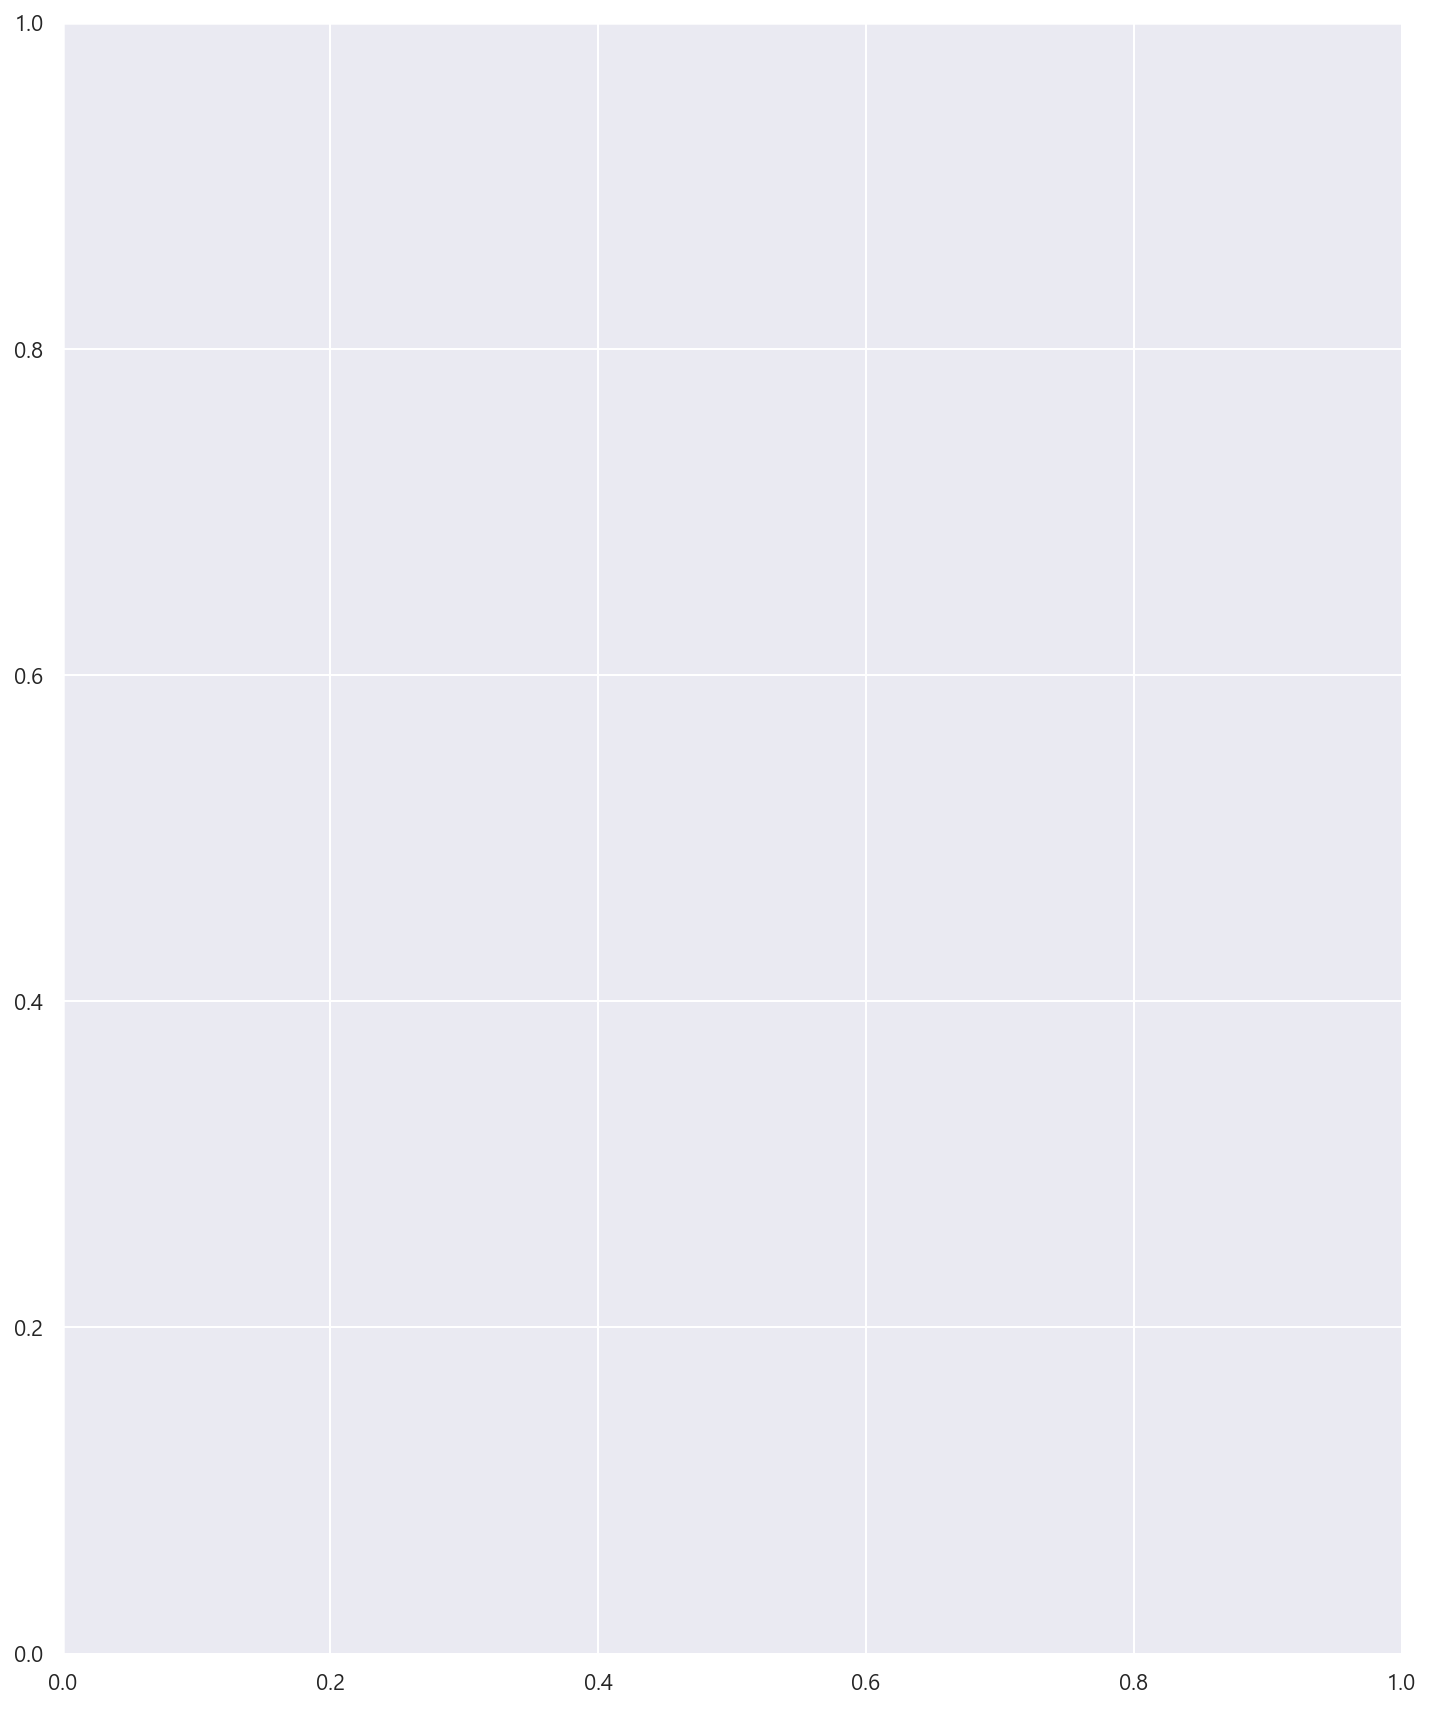

In [44]:
#feature 중요도도 그려볼 수 있다. 
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 15))

# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(lgbm_wrapper, ax=ax)
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize = 30)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# 파일에 넣기

In [ ]:
sub = pd.read_csv('LGBM+oversample+hyperopt.csv')

In [ ]:
sub['Y_LABEL'] = preds
sub.head(3)

In [ ]:
sub.to_csv('LGBM+oversample+hyperopt.csv',index=False)

# TEST

In [ ]:
test_new